# MODULE -IV: UNSUPERVISED LEARNING (LAB- EXAM)

##  Online Shoppers Intention Data Analysis
In this exam, we are required to perform Exploratory Data Analysis on Online Shoppers Intention dataset and implement all the clustering algorithms on the dataset that have been covered in the class by removing class label. We are also required to perform hyper parameter tuning of algorithms and evaluate the results.

### 1. Data Description

In [1]:
# importing relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the dataset in python notebook

df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

The datset contains 17 features and 'Revenue' is the target variable as mentioned.

In [4]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

1. Total samples in the dataset are 12330.
2. The data set contains missing values.
3. There are four features of integer type, ten features of float type, 2 features of object type, one feature of boolean type and the target variable is of boolean type.
4. There are incorrect data types in the dataset.

##### i) Handling Missing Values

In [6]:
missing_values_series=df.isnull().sum()
missing_columns=missing_values_series[missing_values_series>0]
missing_columns_df=(missing_columns.sort_values()/df.shape[0])*100
x_col="Attributes"
y_col="Missing Pct %"
missing_columns_df=pd.DataFrame(data=np.column_stack([missing_columns_df.index,missing_columns_df.values]),columns=[x_col,y_col])
missing_columns_df

,Attributes,Missing Pct %
0,Administrative,0.113544
1,Administrative_Duration,0.113544
2,Informational,0.113544
3,Informational_Duration,0.113544
4,ProductRelated,0.113544
5,ProductRelated_Duration,0.113544
6,BounceRates,0.113544
7,ExitRates,0.113544


As the the percentage of missing data is quite low than non missing data, I will impute the missing data with the appropriate central tendency value..

In [7]:
# Imputing missing values with median because they are number of pages
df['Administrative'] = df['Administrative'].fillna(df['Administrative'].median())
df['Informational'] = df['Informational'].fillna(df['Informational'].median())
df['ProductRelated'] = df['ProductRelated'].fillna(df['ProductRelated'].median())

In [8]:
# Imputing remaining missing values with mean 
df=df.fillna(df.mean())
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

##### ii) Handling Incorrect data types

In [9]:
# Float type to integer type
df['Administrative'] = df['Administrative'].astype(int)
df['Informational'] = df['Informational'].astype(int)
df['ProductRelated'] = df['ProductRelated'].astype(int)

In [10]:
# Integer type to object type
df['Browser'] = df['Browser'].astype('str')
df['Region'] = df['Region'].astype('str')
df['TrafficType'] = df['TrafficType'].astype('str')

In [11]:
# Boolean type to object type 
df['Revenue'] = df['Revenue'].astype('str')
df['Weekend'] = df['Weekend'].astype('str')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int32  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int32  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int32  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

##### iii) Unique Values

In [13]:
df.nunique()

Administrative               27
Administrative_Duration    3337
Informational                17
Informational_Duration     1260
ProductRelated              311
ProductRelated_Duration    9553
BounceRates                1873
ExitRates                  4778
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

##### iv) Duplicate Values

In [14]:
df.duplicated().sum()

119

In [15]:
df_new=df.drop_duplicates()

In [16]:
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


The dataset contains duplicate rows. Better to remove them before implementing machine learning model

In [17]:
df1 = df_new.copy()

### 2. Perform Exploratory Data Analysis

###### Revenue Analysis

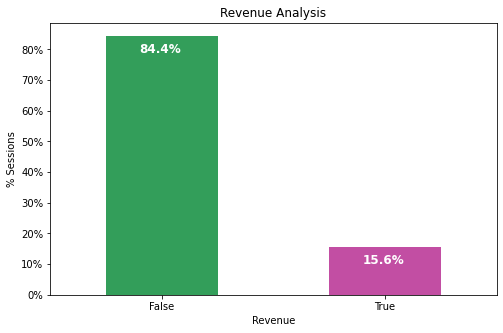

In [18]:
import matplotlib.ticker as mtick
plt.figure(figsize = (8,5))
colors = ['#339e5a','#c24ea3']

ax1 = (df1['Revenue'].value_counts()*100.0 /len(df1)).plot(kind='bar', stacked = True,
                    rot = 0,color=colors)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel('% Sessions')
ax1.set_xlabel('Revenue')
ax1.set_title('Revenue Analysis')
totals = []

for i in ax1.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax1.patches:
    ax1.text(i.get_x()+.15, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

- The bar plot above shows comparison among two statuses of Revenue which is the target variable.
- From the plot, it can be seen that 84.4% of sessionsresults in no revenue and 15.6% of sessions results in revenue making it an imbalanced dataset.

###### Weekeend Analysis

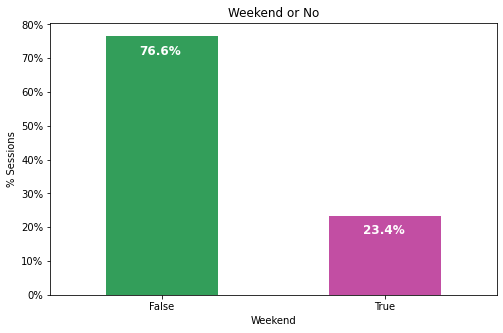

In [19]:
plt.figure(figsize = (8,5))
colors = ['#339e5a','#c24ea3']

ax1 = (df1['Weekend'].value_counts()*100.0 /len(df1)).plot(kind='bar', stacked = True,
                    rot = 0,color=colors)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel('% Sessions')
ax1.set_xlabel('Weekend')
ax1.set_title('Weekend or No')
totals = []

for i in ax1.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax1.patches:
    ax1.text(i.get_x()+.15, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

- The bar plot above shows whether the sessions happens in weekend or not.
- From the plot, it can be seen that 76.6% of sessions do not happens in weekend and 23.4% of sessions happens in weekend. 

###### What months does customers visit pages?

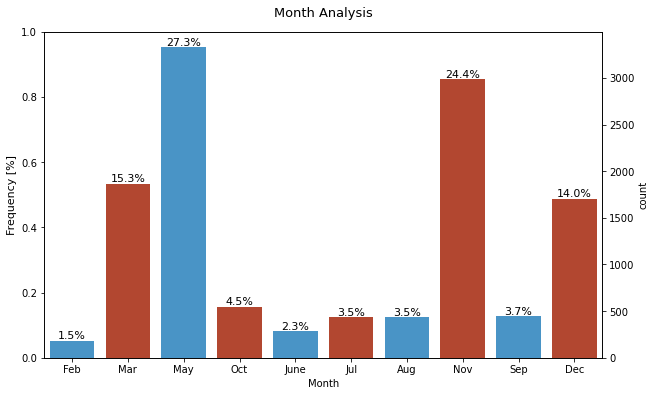

In [20]:
colors = ["#3498db", "#C8391A"]
ncount = len(df1)
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x=df1['Month'], data=df1, palette=colors)

ax2=ax.twinx()

ax2.yaxis.tick_left()
ax.yaxis.tick_right()

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]',fontsize=11)

for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom', fontsize=11) # set the alignment of the text

ax.set_title(df['Month'].describe().name + ' Analysis', size=13, pad=15)
        
plt.show()

- The bar plot above shows frequency of sessions in months.
- It is observed that most sessions were made on May followed by November. 
- Least sessions are observed in February.

##### Types of Visitors

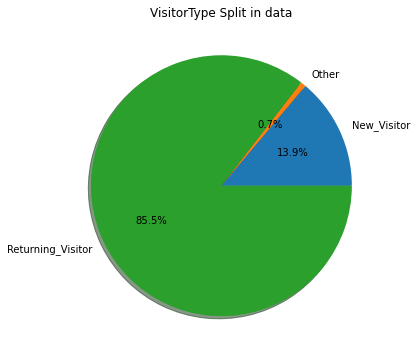

In [21]:
data_VisitorType = df1.groupby('VisitorType')['VisitorType'].count()
data_VisitorType = pd.DataFrame({'VisitorType':data_VisitorType.index, 'Count':data_VisitorType.values})
plt.figure(figsize = (6,6))
plt.pie(data_VisitorType['Count'],labels = data_VisitorType['VisitorType'],autopct='%1.1f%%',shadow=True);
plt.title('VisitorType Split in data');

- The pie chart above shows types of visitors who visited web pages.
- 85.5% are returning visitors and 13.9% are new visitors.

###### Q. Where does most of the customers visiting the website belonging to?

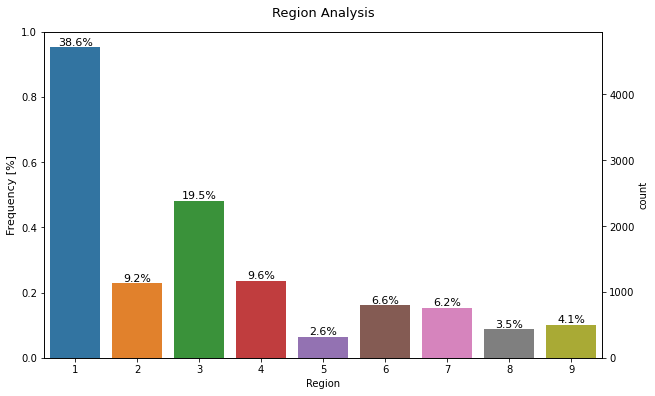

In [23]:
ncount = len(df1)
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x=df1['Region'], data=df1)

ax2=ax.twinx()

ax2.yaxis.tick_left()
ax.yaxis.tick_right()

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]',fontsize=11)

for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom', fontsize=11) 

ax.set_title(df['Region'].describe().name + ' Analysis', size=13, pad=15)
        
plt.show()

- The chart above shows different regions from where websites were visited.
- It can be observed most visitors who visited websites belongs to Region 1 and few visitors belongs to Region 5.

###### Q. How does longer duration spent on the website affect the bounce rate

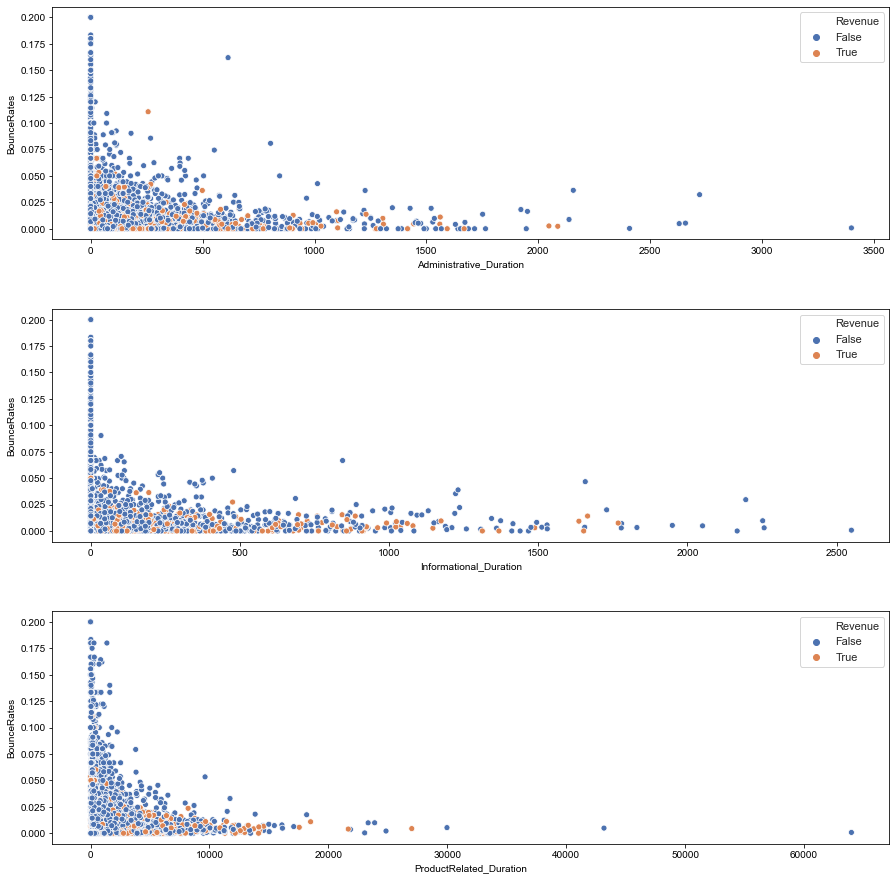

In [24]:
fig, ax = plt.subplots(3,figsize=(15,15))

sns.set(style="ticks")

ax1 = sns.scatterplot(x="Administrative_Duration", y="BounceRates",hue="Revenue", data=df1, ax=ax[0])
ax2 = sns.scatterplot(x="Informational_Duration", y="BounceRates",hue="Revenue", data=df1, ax=ax[1])
ax3 = sns.scatterplot(x="ProductRelated_Duration", y="BounceRates",hue="Revenue", data=df1, ax=ax[2])

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)


- The plot above shows affect of web page duration on bounce rates.
- It can be seen that longer duration spent on the website decreases bounce rates.

###### Q. How would you differentiate between serious and non-serious customers?

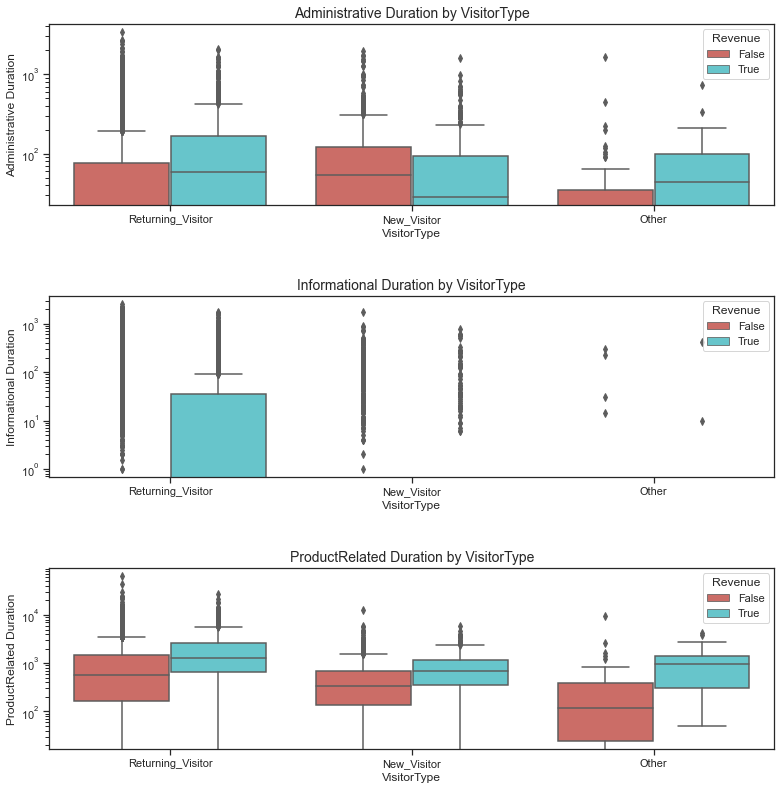

In [25]:
fig, axes = plt.subplots(3,1, figsize=(13,13))
ax1 = sns.boxplot(x="VisitorType",y="Administrative_Duration", data=df1,hue='Revenue',palette="hls", ax = axes[0])
ax1.set_xlabel("VisitorType", fontsize=12)
ax1.set_ylabel("Administrative Duration", fontsize=12)
ax1.set_title("Administrative Duration by VisitorType", fontsize=14)
ax1.set_yscale('log')

ax2 = sns.boxplot(x="VisitorType",y="Informational_Duration", data=df1,hue='Revenue',palette="hls", ax = axes[1])
ax2.set_xlabel("VisitorType", fontsize=12)
ax2.set_ylabel("Informational Duration", fontsize=12)
ax2.set_title("Informational Duration by VisitorType", fontsize=14)
ax2.set_yscale('log')

ax3 = sns.boxplot(x="VisitorType",y="ProductRelated_Duration", data=df1,hue='Revenue',palette="hls", ax = axes[2])
ax3.set_xlabel("VisitorType", fontsize=12)
ax3.set_ylabel("ProductRelated Duration", fontsize=12)
ax3.set_title("ProductRelated Duration by VisitorType", fontsize=14)
ax3.set_yscale('log')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5, top = 0.9)

- The plot above shows types of visitors who spent certain duration in different web sites and the revenue status.
- Customers who are returning visitors shows higher chance of buying a product and are serious customers.
- Also customers who spent most time on product related page shows higher chance of buying a product.
- In contrast, customers who are new visitors shows lower chance of buying a product.
- Customers do not spent much time on informational page but spent a lot of time on product related pages
- Only returning customers spent time on informational page and buys product

###### Q. How does exit rate affect revenue?

Text(0.5, 1.0, 'Revenue by Exit Rates')

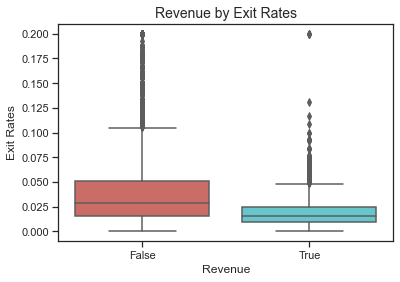

In [26]:
ax1 = sns.boxplot(x="Revenue",y="ExitRates", data=df1,palette="hls")
ax1.set_xlabel("Revenue", fontsize=12)
ax1.set_ylabel("Exit Rates", fontsize=12)
ax1.set_title("Revenue by Exit Rates", fontsize=14)

- The plot above shows boxplots of revenue against exit rates
- When exit rates are low around 0.02, there is higher chance that customer will buy a product
- Exit rates higher than 0.03 results in no revenue.

###### Q. What is the effect of Traffic type on Revenue?

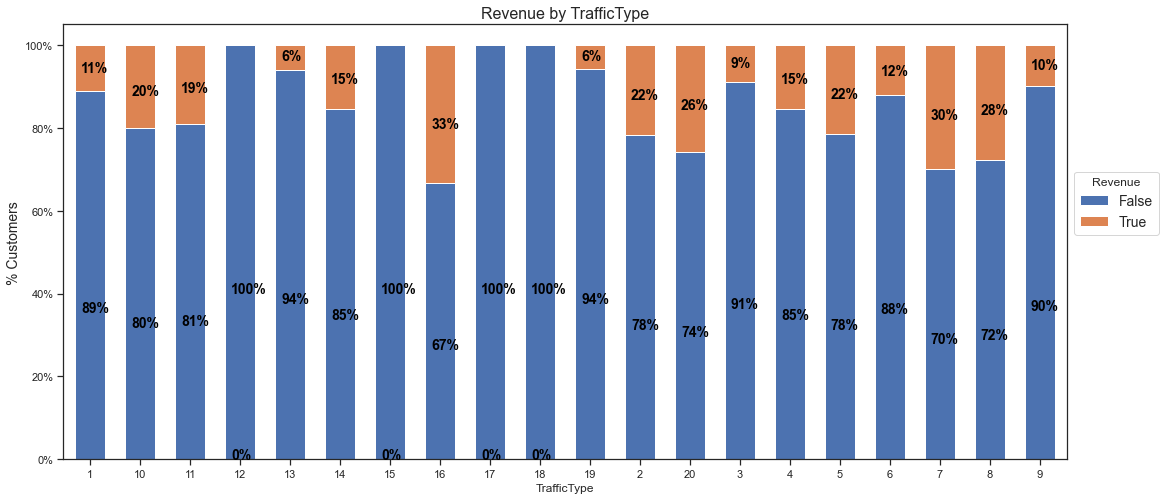

In [27]:
import matplotlib.ticker as mtick
traffic_revenue = df1.groupby(['TrafficType','Revenue']).size().unstack()

ax = (traffic_revenue.T*100.0 / traffic_revenue.T.sum()).T.plot(kind='bar',
                                                                width = 0.6,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (18,8))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(bbox_to_anchor=(1, 0.5),loc='lower left',prop={'size':14},title = 'Revenue')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Revenue by TrafficType',size = 16)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.20*width, p.get_y()+.4*height),
                color = 'black',
               weight = 'bold',size =14)

- The plot above shows percentage of revenue at each traffic type
- Traffic type 12, 15, 17 and 18 shows no revenue
- Traffic type 16 shows highest percent of customers resulting in revenue, 33% compared to other traffic types
- There is always less chance of revenue in all traffic type

###### Administrative Sessions

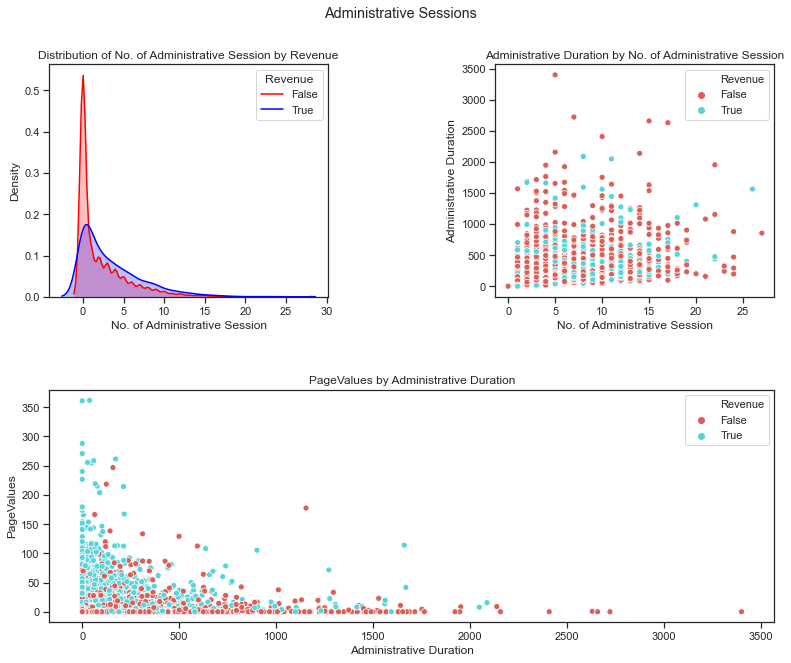

In [28]:
plt.figure(figsize = (13,10))

ax = plt.subplot(221)
ax = sns.kdeplot(df1['Administrative'][(df1["Revenue"] == 'False') ],
                color="Red", shade = True)
ax = sns.kdeplot(df1['Administrative'][(df1["Revenue"] == 'True') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["False","True"],loc='upper right',title = 'Revenue')
ax.set_ylabel('Density')
ax.set_xlabel('No. of Administrative Session')
ax.set_title('Distribution of No. of Administrative Session by Revenue')

ax1 = plt.subplot(222)
ax1 = sns.scatterplot(x="Administrative", y="Administrative_Duration", data=df1, palette="hls", hue = "Revenue")
ax1.set_xlabel("No. of Administrative Session", fontsize=12)
ax1.set_ylabel("Administrative Duration", fontsize=12)
ax1.set_title("Administrative Duration by No. of Administrative Session")

ax2 = plt.subplot(212)
ax2 = sns.scatterplot(x="Administrative_Duration", y="PageValues", data=df1, palette="hls", hue = "Revenue")
ax2.set_xlabel("Administrative Duration")
ax2.set_ylabel("PageValues", fontsize=12)
ax2.set_title("PageValues by Administrative Duration")

plt.suptitle('Administrative Sessions')
plt.subplots_adjust(wspace = 0.6, hspace = 0.4, top = 0.9)

- The plots above shows information related to Administrative Sessions.
- It is observed that chances of revenue are higher at high no. of administrative pages
- Administrative duration is higher when no. of administrative sessions are 5-15
- Page value decreases with increase Administrative Duration

###### Informational Sessions

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


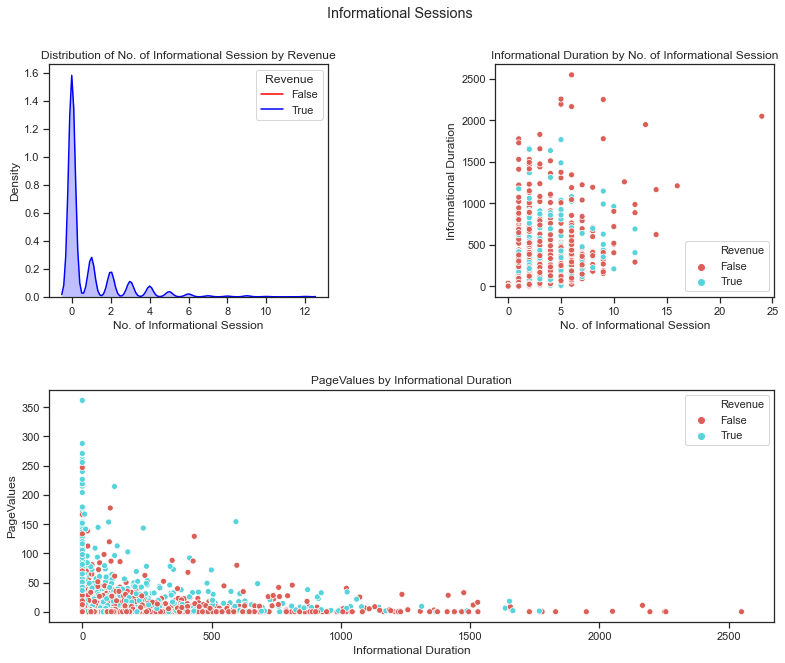

In [29]:
plt.figure(figsize = (13,10))

ax = plt.subplot(221)
ax = sns.kdeplot(df1['Informational'][(df1["Revenue"] == 'False') ],
                color="Red", shade = True)
ax = sns.kdeplot(df1['Informational'][(df1["Revenue"] == 'True') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["False","True"],loc='upper right',title = 'Revenue')
ax.set_ylabel('Density')
ax.set_xlabel('No. of Informational Session')
ax.set_title('Distribution of No. of Informational Session by Revenue')

ax1 = plt.subplot(222)
ax1 = sns.scatterplot(x="Informational", y="Informational_Duration", data=df1, palette="hls", hue = "Revenue")
ax1.set_xlabel("No. of Informational Session", fontsize=12)
ax1.set_ylabel("Informational Duration", fontsize=12)
ax1.set_title("Informational Duration by No. of Informational Session")

ax2 = plt.subplot(212)
ax2 = sns.scatterplot(x="Informational_Duration", y="PageValues", data=df1, palette="hls", hue = "Revenue")
ax2.set_xlabel("Informational Duration")
ax2.set_ylabel("PageValues", fontsize=12)
ax2.set_title("PageValues by Informational Duration")

plt.suptitle('Informational Sessions')
plt.subplots_adjust(wspace = 0.6, hspace = 0.4, top = 0.9)

- The plots above shows information related to Informational Sessions.
- It is observed that chances of revenue tends to decrease with increase in no. of informational pages
- Informational duration is higher when no. of Informational sessions are 1-6
- Page value decreases with increase in Informational Duration

###### Product Related Sessions

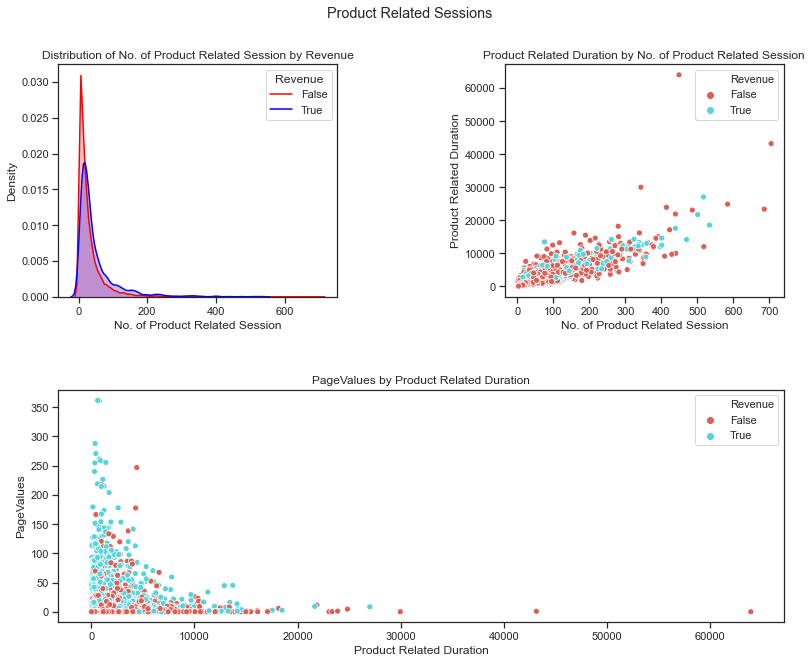

In [30]:
plt.figure(figsize = (13,10))

ax = plt.subplot(221)
ax = sns.kdeplot(df1['ProductRelated'][(df1["Revenue"] == 'False') ],
                color="Red", shade = True)
ax = sns.kdeplot(df1['ProductRelated'][(df1["Revenue"] == 'True') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["False","True"],loc='upper right',title = 'Revenue')
ax.set_ylabel('Density')
ax.set_xlabel('No. of Product Related Session')
ax.set_title('Distribution of No. of Product Related Session by Revenue')

ax1 = plt.subplot(222)
ax1 = sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration", data=df1, palette="hls", hue = "Revenue")
ax1.set_xlabel("No. of Product Related Session", fontsize=12)
ax1.set_ylabel("Product Related Duration", fontsize=12)
ax1.set_title("Product Related Duration by No. of Product Related Session")

ax2 = plt.subplot(212)
ax2 = sns.scatterplot(x="ProductRelated_Duration", y="PageValues", data=df1, palette="hls", hue = "Revenue")
ax2.set_xlabel("Product Related Duration")
ax2.set_ylabel("PageValues", fontsize=12)
ax2.set_title("PageValues by Product Related Duration")

plt.suptitle('Product Related Sessions')
plt.subplots_adjust(wspace = 0.6, hspace = 0.4, top = 0.9)

- The plots above shows information related to Product Related Sessions.
- It is observed that chances of revenue are higher at high no. of Product Related pages
- Product Related duration increases with increase in number of Product Related sessions
- Page value decreases with increase in Product Related Duration

###### Exit Rates vs Bounce Rates

Text(0.5, 1.0, 'ExitRates vs BounceRates')

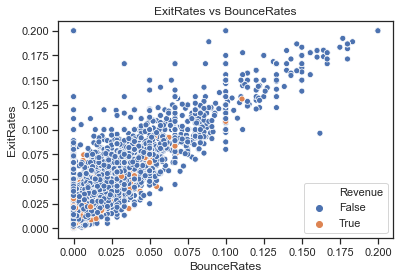

In [31]:
ax = sns.scatterplot(x="BounceRates", y="ExitRates",hue = 'Revenue', data=df1)
ax.set_title('ExitRates vs BounceRates')

- Exit rates and bounce rates has positive correlation
- High Bounce and Exit Rates lead to no Revenue
- Revenue data is heavily imbalanced

###### Weekend and Months vs Revenue

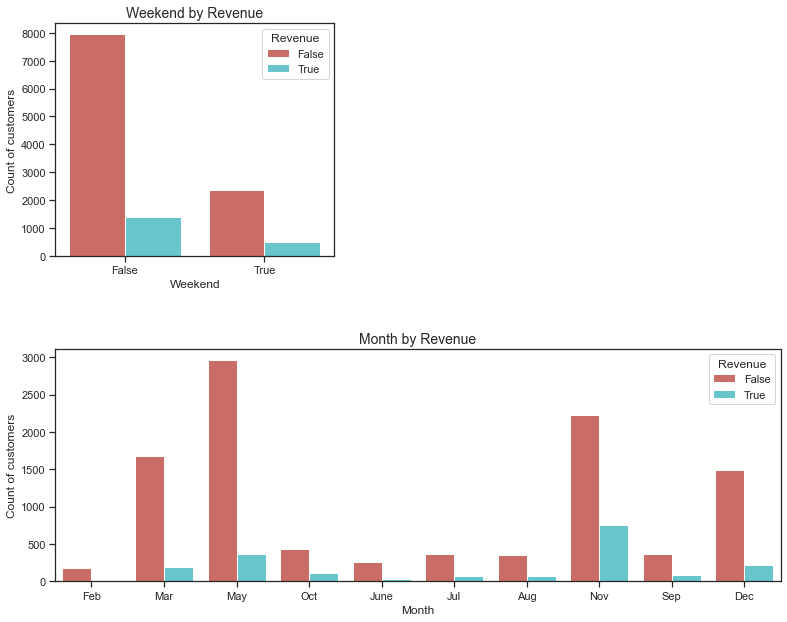

In [32]:
plt.figure(figsize = (13,10))

ax = plt.subplot(221)
ax = sns.countplot(x="Weekend", data=df1, 
              palette="hls", hue="Revenue")
ax.set_xlabel("Weekend", fontsize=12)
ax.set_ylabel("Count of customers", fontsize=12)
ax.set_title("Weekend by Revenue", fontsize=14)


ax2 = plt.subplot(212)
ax2 = sns.countplot(x="Month", data=df1, 
              palette="hls", hue="Revenue")
ax2.set_xlabel("Month", fontsize=12)
ax2.set_ylabel("Count of customers", fontsize=12)
ax2.set_title("Month by Revenue", fontsize=14)

plt.subplots_adjust(wspace = 0.6, hspace = 0.4, top = 0.9)

- The plot above shows revenue status in months and weekends
- Lower percent of customers revenue in weekends
- Highest revenue in November and no revenue in February

###### Number of Operating Systems

Text(0.5, 1.0, 'Revenue = False')

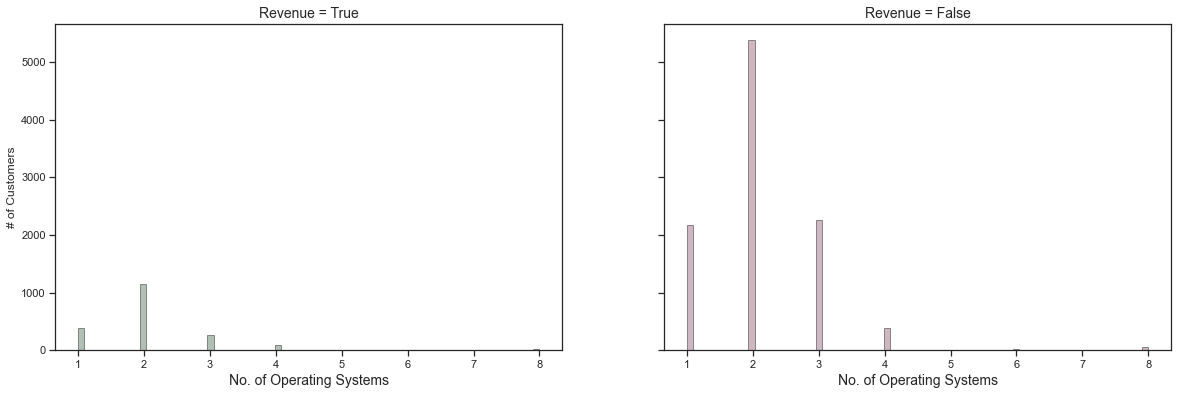

In [103]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = (20,6))

ax = sns.distplot(df1[df1['Revenue']=='True']['OperatingSystems'],
                   hist=True, kde=False,
                   bins=75, color = '#3a6347',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('No. of Operating Systems',size = 14)
ax.set_title('Revenue = True',size = 14)

ax = sns.distplot(df1[df1['Revenue']=='False']['OperatingSystems'],
                   hist=True, kde=False,
                   bins=75, color = '#854d65',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('No. of Operating Systems',size = 14)
ax.set_title('Revenue = False',size = 14)

- The output shows number of operating systems and number of customers with and without revenue
- Most customers having 2 operating systems mostly results in revenue compared to other no. of operating systems

#### - Dealing with outliers

In [33]:
df1.shape

(12211, 18)

Text(0.5, 0.98, 'Boxplots showing outliers')

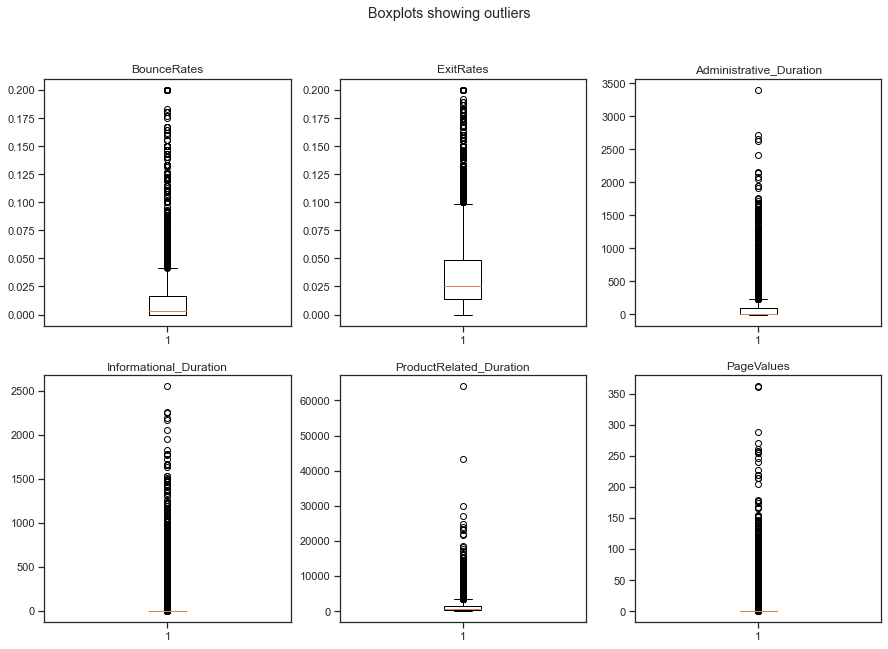

In [34]:
plt.figure(figsize = (15, 10))

ax=plt.subplot(231)
plt.boxplot(df1['BounceRates'])
ax.set_title('BounceRates')

ax=plt.subplot(232)
plt.boxplot(df1['ExitRates'])
ax.set_title('ExitRates')

ax=plt.subplot(233)
plt.boxplot(df1['Administrative_Duration'])
ax.set_title('Administrative_Duration')

ax=plt.subplot(234)
plt.boxplot(df1['Informational_Duration'])
ax.set_title('Informational_Duration')

ax=plt.subplot(235)
plt.boxplot(df1['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')

ax=plt.subplot(236)
plt.boxplot(df1['PageValues'])
ax.set_title('PageValues')

plt.suptitle('Boxplots showing outliers')

In [35]:
from scipy import stats

num_col = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
data = df1[num_col]

z=np.abs(stats.zscore(data))
filtered_entries = (z < 3).all(axis=1)
df2 = df1[filtered_entries]
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False


In [36]:
df2.shape

(10749, 18)

1462 records were detected as outliers, so after removing them, the data contains 10749 records.

### 3. Finding correlated variables

In this section, I will use Random Forest and Pearson Correlation method to find feature importance.

#### i) Embeded Method (Random Forest)

In [37]:
# Dataset for Random Forest test

df3 = df2.copy()
df3.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False


In [38]:
# Loading libraries for Random Forest test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df3['Month'] = df3['Month'].replace(['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10])
df3['Weekend'] = df3['Weekend'].replace(['True','False'],[1,0])

# Excluding target variable
data=df3.drop(['Revenue'],axis=1)

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['VisitorType']=encoder.fit_transform(data['VisitorType'])

df['Browser'] = df['Browser'].astype(int)
df['Region'] = df['Region'].astype(int)
df['TrafficType'] = df['TrafficType'].astype(int)
    
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,1,2,2,1,2,2,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,1,3,2,2,4,2,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,1,3,3,1,4,2,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,1,2,2,1,3,2,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,1,2,2,2,3,2,0


In [39]:
# Labelling X and y for the test
X=data
y=df3['Revenue']

# Creating X_train & Y_train labels
X_train=data
Y_train=y

# Preprocessing Y-train data into integer type
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)

# Defining Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,training_scores_encoded)

importances = clf.feature_importances_

#Sorting 
sorted_feature_importance = sorted(zip(importances, list(X_train)),
reverse=True)

feature_imp2 = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

[Text(0.5, 0, 'Feature Importance')]

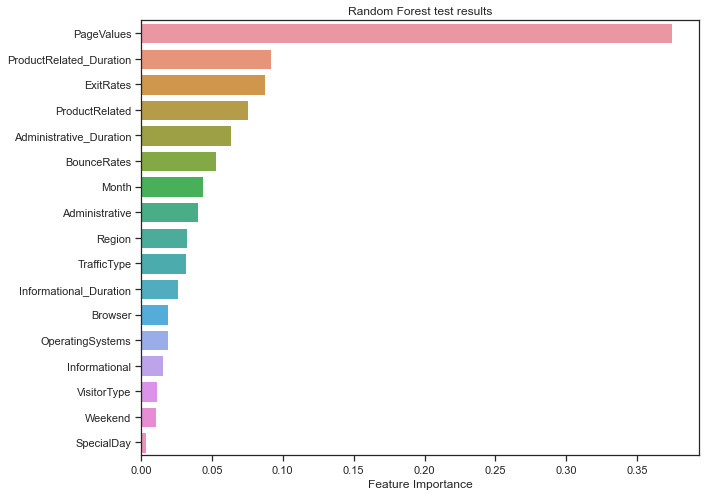

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.barplot(x=feature_imp2, y=feature_imp2.index)
ax.set_title('Random Forest test results')
ax.set(xlabel='Feature Importance')

- According to Random Forest test results, Page Values, Product Related Duration and Exit Rates are most correlated with Revenue Type.
- Special Day, Weekend and Visitor type shows less correlation with Revenue.


Lets identify important variables from Pearson Correlation Method.

#### ii) Pearson Correlation Method

In [41]:
# Dataset for Pearson's Correlation test
df4 = df2.copy()
df4['Revenue'] = df4['Revenue'].replace(['True','False'],[1,0])
df4.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,0


In [42]:
# correlation between all continuous variables
cor_matrix=df4.corr()

# Sorting numerical features in descending order based on correlation coefficient between Price
features_cor=(cor_matrix['Revenue'].sort_values(ascending=False))
features_imp=features_cor.drop('Revenue')

Text(0.5, 1.0, 'Pearson Correlation test results')

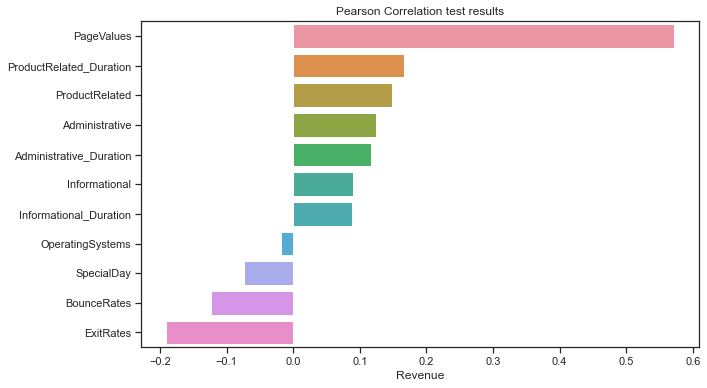

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
ax=sns.barplot(x=features_imp, y=features_imp.index)
ax.set_title('Pearson Correlation test results')

- Page Values, Product Related Duration and Product Related Sessions seem to be positively correlated with Revenue. While, Exit Rates and Bounce Rates seem to be negatively correlated with Revenue.
- Interstingly, Exit Rates shows lowest correlation with Revenue in contrast to Random forest results..

### 4. Implementation of Clustering Algorithms

In this section, I will implement all the clustering algorithms studied in class and analyze statistics for each cluster identified. Finally I will assess cluster validity scores to suggest the best possible clustering algorithm for the given data.

###### Preparation of Clustering Data

In [44]:
df_cluster = data.drop(['Month','VisitorType'], axis=1)
df_cluster.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,3,0


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster)

In [46]:
# Class label
target = df4['Revenue']
class_label = np.asarray(target)

#### i) K-Means Algorithm

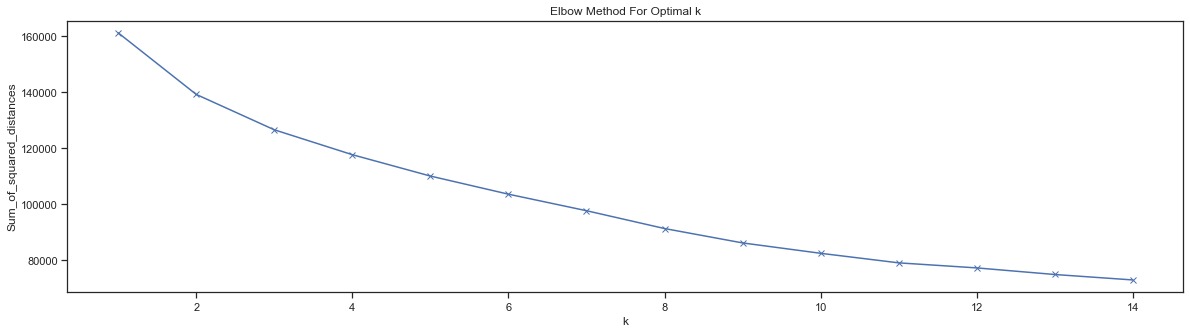

In [47]:
# importing kmeans library
from sklearn.cluster import KMeans

# Elbow method to determine optimal k clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The optimal K value is found to be 2 using the elbow method

In [48]:
model = KMeans(n_clusters=2)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

from sklearn import metrics
labels_unique = np.unique(kmeans_labels)
n_clusters_K = len(labels_unique)
Si_K=metrics.silhouette_score(df_cluster, kmeans_labels, metric='euclidean').round(3)
DB_K=metrics.davies_bouldin_score(df_cluster, kmeans_labels).round(3)
CH_K=metrics.calinski_harabasz_score(df_cluster, kmeans_labels).round(3)

print('================================ K Means Algorithm Internal Evaluation =================================')
print()
print ("Silhoutte Score:" "\n", Si_K)
print()
print("Davies-Bouldin Score:" "\n", DB_K)
print()
print ("Calinski-Harabasz Score:" "\n", CH_K)
print()
print("Number of clusters:" "\n", n_clusters_K)

================================ K Means Algorithm Internal Evaluation =================================

Silhoutte Score:
 0.44

Davies-Bouldin Score:
 1.137

Calinski-Harabasz Score:
 4994.437

Number of clusters:
 2


K-Means Algorithm


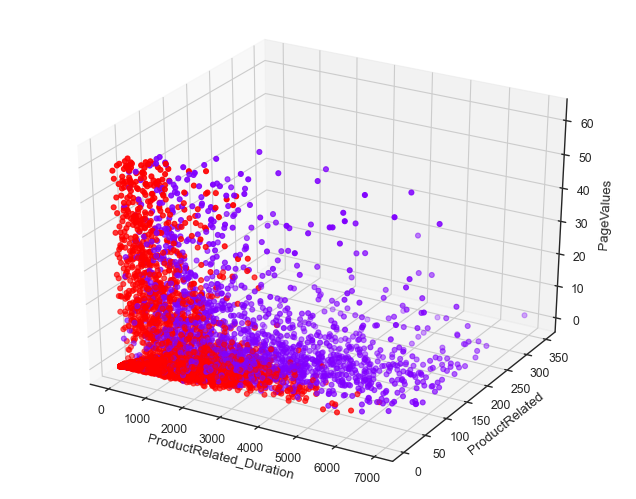

In [49]:
# Cluster visualization using the best features

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['ProductRelated_Duration'],df_cluster['ProductRelated'],df_cluster['PageValues'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.8)
yLabel = ax.set_ylabel('ProductRelated', linespacing=3.8)
zLabel = ax.set_zlabel('PageValues', linespacing=3.4)

print("K-Means Algorithm")

In [50]:
df_clustered_kmeans = df_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Weekend
Cluster,,,,,,,,,,,,
0,5.8,177.2,1.5,70.1,63.2,2310.8,0.0,0.0,8.1,0.0,2.1,0.2
1,1.2,30.8,0.1,3.0,19.0,680.5,0.0,0.0,2.9,0.1,2.1,0.2


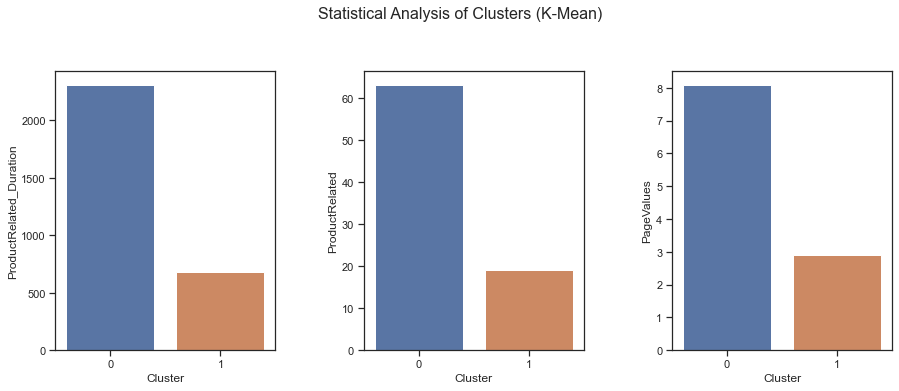

In [51]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=grouped_kmeans.index, y=grouped_kmeans.ProductRelated_Duration, ax = axs[0])
sns.barplot(x=grouped_kmeans.index, y=grouped_kmeans.ProductRelated, ax = axs[1])
sns.barplot(x=grouped_kmeans.index, y=grouped_kmeans.PageValues, ax = axs[2])            
plt.suptitle('Statistical Analysis of Clusters (K-Mean)',y=1.08, fontsize=16)
plt.subplots_adjust(wspace = 0.4, hspace = 0.3, top = 0.9)

plt.show()

##### Characteristics of Clusters:
The table and barplot above shows centroids of each clusters that could determine the clusters characteristics.
These are:

i) Cluster 0: 
- Number of Administrative pages in a session is around 6
- Administrative Duration is around 177
- Number of Informational pages in a session is between 1 and 2
- Informational Duration is around 70.1
- Number of Product Related pages in a session is close to 63
- Product Related Duration is around 2312.8
- Has mean page value of 8.1
- Closeness to special day is 0.0


ii) Cluster 1:
- Number of Administrative pages in a session is around 1
- Administrative Duration is around 30.8
- Number of Informational pages in a session is around 0
- Informational Duration is around 3
- Number of Product Related pages in a session is close to 19
- Product Related Duration is around 680
- Has mean page value of 2.9
- Closeness to special day is 0.1

####  - External Validation for K-Mean Algorithm

External validation is performed when the class labels are available. Class labels for this data is 'Revenue'. Since Revenue consists of two labels, 'True' and 'False', I will ask the algorithm to divide the data into two clusters (or centers) to be able to predict 'True' and 'False' Revenue.

In [52]:
model = KMeans(n_clusters=2)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

AMI_K = metrics.adjusted_mutual_info_score(class_label, kmeans_labels)
ARI_K = metrics.adjusted_rand_score(class_label, kmeans_labels)
comp_K = metrics.completeness_score(class_label, kmeans_labels)
homo_K = metrics.homogeneity_score(class_label, kmeans_labels)
MI_K = metrics.mutual_info_score(class_label, kmeans_labels)

print("K Means Algorithm External Validation Scores")
print()
print ("Adjusted Mutual Info Score:" "\n", AMI_K)
print("Adjusted Random Score:" "\n", ARI_K)
print ("Mutual Information Score:" "\n", MI_K)
print("Completeness Score:" "\n", comp_K)
print("Homogeneity Score:" "\n", homo_K)

K Means Algorithm External Validation Scores

Adjusted Mutual Info Score:
 0.0305905090947255
Adjusted Random Score:
 0.11080787181936981
Mutual Information Score:
 0.01450995129155358
Completeness Score:
 0.02717104774060476
Homogeneity Score:
 0.0352452894794566


#### ii) Mini Batch K-Means Algorithm

I will be using k=2 just like for k-mean algorithm

In [53]:
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.cluster import MiniBatchKMeans
batch_size = 45

# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 2, 
                      batch_size = batch_size, n_init = 10, 
                      max_no_improvement = 10, verbose = 0) 
  
mbk.fit(cluster_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(cluster_scaled, mbk_means_cluster_centers) 

from sklearn import metrics
labels_unique = np.unique(mbk_means_labels)
n_clusters_mK = len(labels_unique)
Si_mK=metrics.silhouette_score(df_cluster, mbk_means_labels, metric='euclidean').round(3)
DB_mK=metrics.davies_bouldin_score(df_cluster, mbk_means_labels).round(3)
CH_mK=metrics.calinski_harabasz_score(df_cluster, mbk_means_labels).round(3)

print('================================ Mini Batch K Means Algorithm Evaluation =================================')
print()
print ("Silhoutte Score:" "\n", Si_mK)
print()
print("Davies-Bouldin Score:" "\n", DB_mK)
print()
print ("Calinski-Harabasz Score:" "\n", CH_mK)
print()
print("Number of clusters:" "\n", n_clusters_mK)

================================ Mini Batch K Means Algorithm Evaluation =================================

Silhoutte Score:
 0.415

Davies-Bouldin Score:
 1.256

Calinski-Harabasz Score:
 3902.956

Number of clusters:
 2


Mini Batch K-Means Algorithm


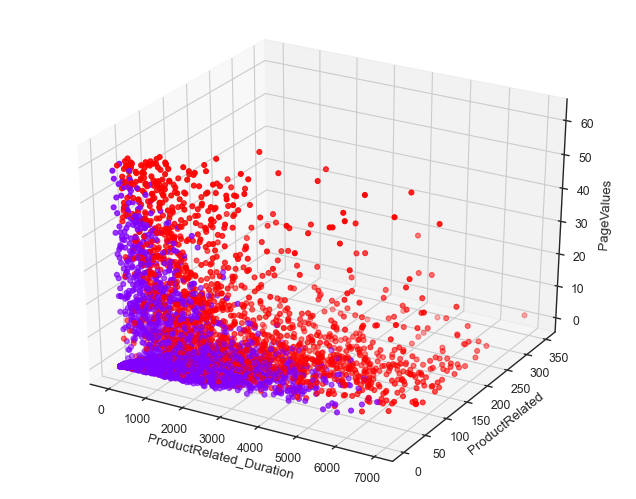

In [54]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['ProductRelated_Duration'],df_cluster['ProductRelated'],df_cluster['PageValues'],c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.8)
yLabel = ax.set_ylabel('ProductRelated', linespacing=3.8)
zLabel = ax.set_zlabel('PageValues', linespacing=3.4)

print("Mini Batch K-Means Algorithm")

In [55]:
df_clustered_mbkmeans = df_cluster.assign(Cluster=mbk_means_labels)
grouped_mbkmeans = df_clustered_mbkmeans.groupby(['Cluster']).mean().round(1)
grouped_mbkmeans

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Weekend
Cluster,,,,,,,,,,,,
0,1.3,35.8,0.1,2.9,20.4,727.0,0.0,0.0,1.9,0.1,2.1,0.2
1,5.7,169.9,1.6,75.9,61.3,2263.6,0.0,0.0,12.3,0.0,2.2,0.3


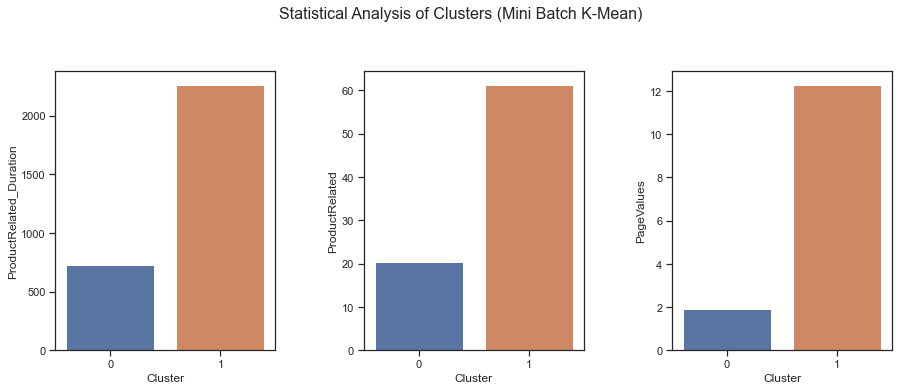

In [56]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=grouped_mbkmeans.index, y=grouped_mbkmeans.ProductRelated_Duration, ax = axs[0])
sns.barplot(x=grouped_mbkmeans.index, y=grouped_mbkmeans.ProductRelated, ax = axs[1])
sns.barplot(x=grouped_mbkmeans.index, y=grouped_mbkmeans.PageValues, ax = axs[2])            
plt.suptitle('Statistical Analysis of Clusters (Mini Batch K-Mean)',y=1.08, fontsize=16)
plt.subplots_adjust(wspace = 0.4, hspace = 0.3, top = 0.9)

plt.show()

##### Characteristics of Clusters:
The table and barplot above shows centroids of each clusters that could determine the clusters characteristics from Mini Batch K Mean.
These are:

i) Cluster 0: 
- Number of Administrative pages in a session is around 1
- Administrative Duration is around 33.2
- Number of Informational pages in a session is around 0
- Informational Duration is around 3.2
- Number of Product Related pages in a session is close to 19
- Product Related Duration is around 687.4
- Has mean page value of 3.1
- Closeness to special day is 0.1


ii) Cluster 1:
- Number of Administrative pages in a session is around 6
- Administrative Duration is around 179.4
- Number of Informational pages in a session is between 1 and 2
- Informational Duration is around 74.7
- Number of Product Related pages in a session is close to 65
- Product Related Duration is around 2412.1
- Has mean page value of 7.6
- Closeness to special day is 0.0

The cluster analysis is same to K Means however there is a slight variation in the mean values. 

####  - External Validation for Mini Batch K-Mean Algorithm

In [57]:
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 2, 
                       batch_size = batch_size, n_init = 10, 
                      max_no_improvement = 10, verbose = 0) 
  
mbk.fit(cluster_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(cluster_scaled, mbk_means_cluster_centers)

AMI_mK = metrics.adjusted_mutual_info_score(class_label, mbk_means_labels)
ARI_mK = metrics.adjusted_rand_score(class_label, mbk_means_labels)
comp_mK = metrics.completeness_score(class_label, mbk_means_labels)
homo_mK = metrics.homogeneity_score(class_label, mbk_means_labels)
MI_mK = metrics.mutual_info_score(class_label, mbk_means_labels)

print("Mini Batch K Means Algorithm External Validation Scores")
print()
print ("Adjusted Mutual Info Score:" "\n", AMI_mK)
print("Adjusted Random Score:" "\n", ARI_mK)
print ("Mutual Information Score:" "\n", MI_mK)
print("Completeness Score:" "\n", comp_mK)
print("Homogeneity Score:" "\n", homo_mK)

Mini Batch K Means Algorithm External Validation Scores

Adjusted Mutual Info Score:
 0.024008168332574402
Adjusted Random Score:
 0.09796578442981337
Mutual Information Score:
 0.011291413537515005
Completeness Score:
 0.02150081415737777
Homogeneity Score:
 0.027427324238754276


#### iii) Mean Shift Algorithm

In [58]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth=estimate_bandwidth(cluster_scaled, quantile=0.6)

analyzer = MeanShift(bandwidth=bandwidth) 
analyzer.fit(cluster_scaled)
mean_labels = analyzer.labels_

from sklearn import metrics
labels_unique = np.unique(mean_labels)
n_clusters_ms = len(labels_unique)
Si_ms=metrics.silhouette_score(df_cluster, mean_labels, metric='euclidean').round(3)
DB_ms=metrics.davies_bouldin_score(df_cluster, mean_labels).round(3)
CH_ms=metrics.calinski_harabasz_score(df_cluster, mean_labels).round(3)

print('================================ Mean Shift Algorithm Evaluation =================================')
print()
print ("Silhoutte Score:" "\n", Si_ms)
print()
print("Davies-Bouldin Score:" "\n", DB_ms)
print()
print ("Calinski-Harabasz Score:" "\n", CH_ms)
print()
print("Number of clusters:" "\n", n_clusters_ms)

================================ Mean Shift Algorithm Evaluation =================================

Silhoutte Score:
 -0.214

Davies-Bouldin Score:
 2.669

Calinski-Harabasz Score:
 391.131

Number of clusters:
 3


Mean Shift Algorithm


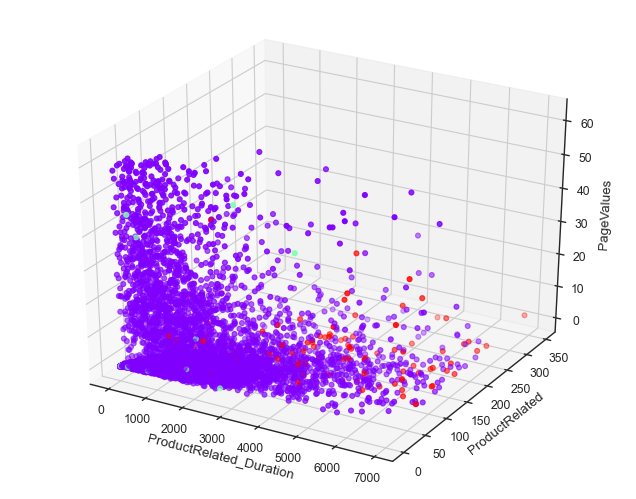

In [59]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['ProductRelated_Duration'],df_cluster['ProductRelated'],df_cluster['PageValues'],c=mean_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.8)
yLabel = ax.set_ylabel('ProductRelated', linespacing=3.8)
zLabel = ax.set_zlabel('PageValues', linespacing=3.4)

print("Mean Shift Algorithm")

In [60]:
df_clustered_means = df_cluster.assign(Cluster=mean_labels)
grouped_means = df_clustered_means.groupby(['Cluster']).mean().round(1)
grouped_means

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Weekend
Cluster,,,,,,,,,,,,
0,2.1,61.9,0.4,15.2,28.1,1014.0,0.0,0.0,4.0,0.1,2.1,0.2
1,2.0,56.1,0.2,1.5,11.6,615.3,0.0,0.0,4.5,0.0,7.2,0.0
2,7.9,217.6,4.0,305.1,111.8,4161.2,0.0,0.0,5.8,0.0,2.2,0.2


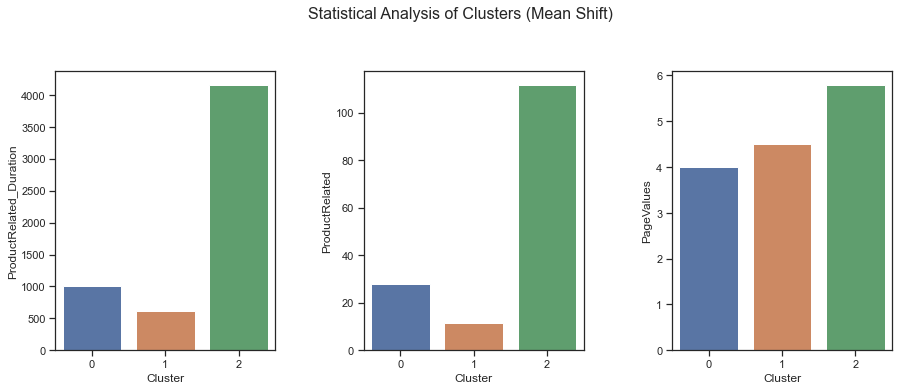

In [61]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=grouped_means.index, y=grouped_means.ProductRelated_Duration, ax = axs[0])
sns.barplot(x=grouped_means.index, y=grouped_means.ProductRelated, ax = axs[1])
sns.barplot(x=grouped_means.index, y=grouped_means.PageValues, ax = axs[2])            
plt.suptitle('Statistical Analysis of Clusters (Mean Shift)',y=1.08, fontsize=16)
plt.subplots_adjust(wspace = 0.4, hspace = 0.3, top = 0.9)

plt.show()

##### Characteristics of Clusters:
The table and barplot above shows centroids of each clusters that could determine the clusters characteristics from Mean Sift. 3 clusters are identified. The mean difference of attributes between cluster 0 and 1 is quite small than mean difference between cluster 2 and other clusters.

####  - External Validation for Mean Shift Algorithm

In [62]:
AMI_ms = metrics.adjusted_mutual_info_score(class_label, mean_labels)
ARI_ms = metrics.adjusted_rand_score(class_label, mean_labels)
comp_ms = metrics.completeness_score(class_label, mean_labels)
homo_ms = metrics.homogeneity_score(class_label, mean_labels)
MI_ms = metrics.mutual_info_score(class_label, mean_labels)

print("Mean Shift Algorithm External Validation Scores")
print()
print ("Adjusted Mutual Info Score:" "\n", AMI_ms)
print("Adjusted Random Score:" "\n", ARI_ms)
print ("Mutual Information Score:" "\n", MI_ms)
print("Completeness Score:" "\n", comp_ms)
print("Homogeneity Score:" "\n", homo_ms)

Mean Shift Algorithm External Validation Scores

Adjusted Mutual Info Score:
 0.0015864747750625257
Adjusted Random Score:
 0.013566333217635543
Mutual Information Score:
 0.00048611509561690986
Completeness Score:
 0.005977930490541054
Homogeneity Score:
 0.001180794264645478


#### iv) Hierarchical Agglomerative Clustering Algorithm

In [63]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
model.fit(cluster_scaled)
hac_labels = model.labels_

labels_unique = np.unique(hac_labels)
n_clusters_hac = len(labels_unique)
Si_hac=metrics.silhouette_score(df_cluster, hac_labels, metric='euclidean').round(3)
DB_hac=metrics.davies_bouldin_score(df_cluster, hac_labels).round(3)
CH_hac=metrics.calinski_harabasz_score(df_cluster, hac_labels).round(3)

print('================================ Hierarchical Agglomerative Clustering Evaluation =================================')
print()
print ("Silhoutte Score:" "\n", Si_hac)
print()
print("Davies-Bouldin Score:" "\n", DB_hac)
print()
print ("Calinski-Harabasz Score:" "\n", CH_hac)
print()
print("Number of clusters:" "\n", n_clusters_hac)

================================ Hierarchical Agglomerative Clustering Evaluation =================================

Silhoutte Score:
 0.27

Davies-Bouldin Score:
 1.816

Calinski-Harabasz Score:
 1951.556

Number of clusters:
 2


Hierarchical Agglomerative Clustering Algorithm


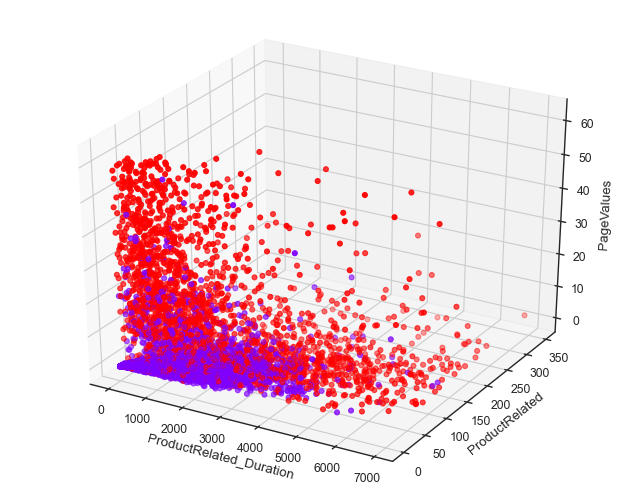

In [64]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['ProductRelated_Duration'],df_cluster['ProductRelated'],df_cluster['PageValues'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.8)
yLabel = ax.set_ylabel('ProductRelated', linespacing=3.8)
zLabel = ax.set_zlabel('PageValues', linespacing=3.4)

print("Hierarchical Agglomerative Clustering Algorithm")

In [65]:
df_clustered_hac = df_cluster.assign(Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Weekend
Cluster,,,,,,,,,,,,
0,1.2,30.0,0.2,5.6,21.3,750.4,0.0,0.0,0.7,0.1,2.1,0.3
1,4.8,149.5,1.0,50.0,48.5,1799.9,0.0,0.0,12.5,0.0,2.1,0.2


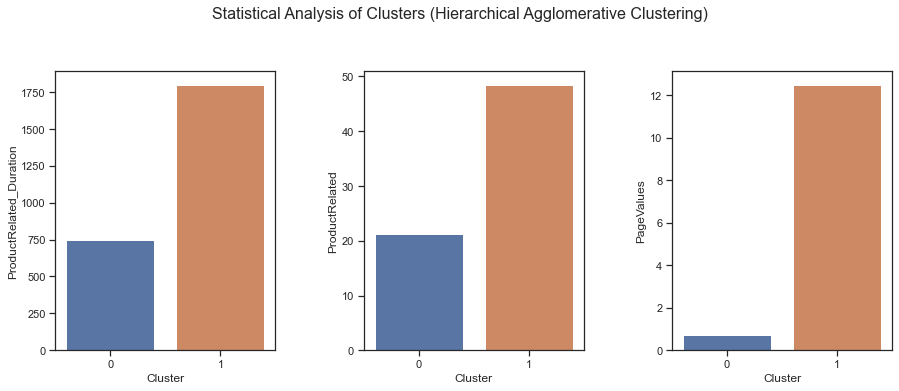

In [66]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=grouped_hac.index, y=grouped_hac.ProductRelated_Duration, ax = axs[0])
sns.barplot(x=grouped_hac.index, y=grouped_hac.ProductRelated, ax = axs[1])
sns.barplot(x=grouped_hac.index, y=grouped_hac.PageValues, ax = axs[2])            
plt.suptitle('Statistical Analysis of Clusters (Hierarchical Agglomerative Clustering)',y=1.08, fontsize=16)
plt.subplots_adjust(wspace = 0.4, hspace = 0.3, top = 0.9)

plt.show()

##### Characteristics of Clusters:
The table and barplot above shows centroids of each clusters that could determine the clusters characteristics from Hierarchical Agglomerative Clustering.
These are:

i) Cluster 0: 
- Number of Administrative pages in a session is around 1
- Administrative Duration is around 30
- Number of Informational pages in a session is around 0
- Informational Duration is around 5.6
- Number of Product Related pages in a session is close to 21
- Product Related Duration is around 750.4
- Has mean page value of 0.7
- Closeness to special day is 0.1


ii) Cluster 1:
- Number of Administrative pages in a session is around 5
- Administrative Duration is around 149.5
- Number of Informational pages in a session is around 1
- Informational Duration is around 50
- Number of Product Related pages in a session is between 48 and 49.
- Product Related Duration is around 1800
- Has mean page value of 12.5
- Closeness to special day is 0.0

####  - External Validation for Hierarchical Agglomerative Clustering

In [67]:
AMI_hac = metrics.adjusted_mutual_info_score(class_label, hac_labels)
ARI_hac = metrics.adjusted_rand_score(class_label, hac_labels)
comp_hac = metrics.completeness_score(class_label, hac_labels)
homo_hac = metrics.homogeneity_score(class_label, hac_labels)
MI_hac = metrics.mutual_info_score(class_label, hac_labels)

print("Hierarchical Agglomerative Clustering External Validation Scores")
print()
print ("Adjusted Mutual Info Score:" "\n", AMI_hac)
print("Adjusted Random Score:" "\n", ARI_hac)
print ("Mutual Information Score:" "\n", MI_hac)
print("Completeness Score:" "\n", comp_hac)
print("Homogeneity Score:" "\n", homo_hac)

Hierarchical Agglomerative Clustering External Validation Scores

Adjusted Mutual Info Score:
 0.11784100301480535
Adjusted Random Score:
 0.2180925397206679
Mutual Information Score:
 0.059210372543206186
Completeness Score:
 0.09992668985954273
Homogeneity Score:
 0.1438245159159544


#### v) DBSCAN Algorithm

In [68]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(cluster_scaled)
dbs_labels = model.labels_

labels_unique = np.unique(dbs_labels)
n_clusters_dbs = len(labels_unique)
Si_dbs=metrics.silhouette_score(df_cluster, dbs_labels, metric='euclidean').round(3)
DB_dbs=metrics.davies_bouldin_score(df_cluster, dbs_labels).round(3)
CH_dbs=metrics.calinski_harabasz_score(df_cluster, dbs_labels).round(3)

print('================================ DBSCAN Algorithm Evaluation =================================')
print()
print ("Silhoutte Score:" "\n", Si_dbs)
print()
print("Davies-Bouldin Score:" "\n", DB_dbs)
print()
print ("Calinski-Harabasz Score:" "\n", CH_dbs)
print()
print("Number of clusters:" "\n", n_clusters_dbs)

================================ DBSCAN Algorithm Evaluation =================================

Silhoutte Score:
 -0.764

Davies-Bouldin Score:
 35.841

Calinski-Harabasz Score:
 10.516

Number of clusters:
 56


DBSCAN Algorithm


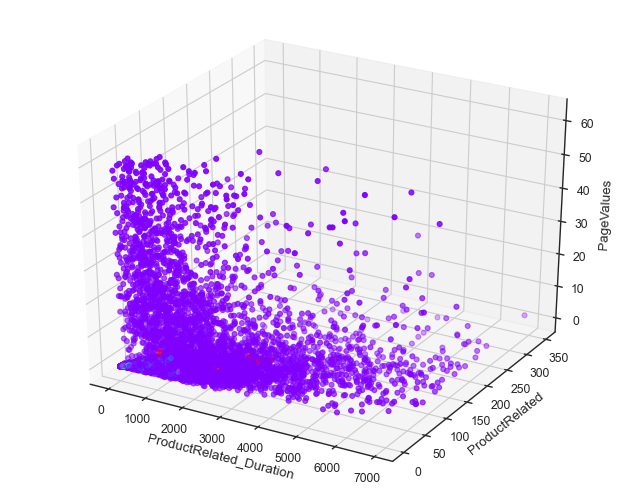

In [69]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['ProductRelated_Duration'],df_cluster['ProductRelated'],df_cluster['PageValues'],c=dbs_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.8)
yLabel = ax.set_ylabel('ProductRelated', linespacing=3.8)
zLabel = ax.set_zlabel('PageValues', linespacing=3.4)

print("DBSCAN Algorithm")

Though, DBSCAN algorithm might be suitable for a number of datasets, from the figure above we can see that DBSCAN is not suitable for this particular dataset. The algorithm has identified 56 number of clusters.

####  - External Validation for DBSCAN Algorithm

In [70]:
AMI_dbs = metrics.adjusted_mutual_info_score(class_label, dbs_labels)
ARI_dbs = metrics.adjusted_rand_score(class_label, dbs_labels)
comp_dbs = metrics.completeness_score(class_label, dbs_labels)
homo_dbs = metrics.homogeneity_score(class_label, dbs_labels)
MI_dbs = metrics.mutual_info_score(class_label, dbs_labels)

print(" DBSCAN Algorithm External Validation Scores")
print()
print ("Adjusted Mutual Info Score:" "\n", AMI_dbs)
print("Adjusted Random Score:" "\n", ARI_dbs)
print ("Mutual Information Score:" "\n", MI_dbs)
print("Completeness Score:" "\n", comp_dbs)
print("Homogeneity Score:" "\n", homo_dbs)

 DBSCAN Algorithm External Validation Scores

Adjusted Mutual Info Score:
 0.016715120655921126
Adjusted Random Score:
 -0.0912814971203471
Mutual Information Score:
 0.011977484391900517
Completeness Score:
 0.017658111270089205
Homogeneity Score:
 0.02909381955499365


#### vi) OPTICS Algorithm

In [71]:
from sklearn.cluster import OPTICS

model = OPTICS()
model.fit(cluster_scaled)
opt_labels = model.labels_

labels_unique = np.unique(opt_labels)
n_clusters_opt = len(labels_unique)
Si_opt=metrics.silhouette_score(df_cluster, opt_labels, metric='euclidean').round(3)
DB_opt=metrics.davies_bouldin_score(df_cluster, opt_labels).round(3)
CH_opt=metrics.calinski_harabasz_score(df_cluster, opt_labels).round(3)

print('================================ OPTICS Algorithm Evaluation =================================')
print()
print ("Silhoutte Score:" "\n", Si_opt)
print()
print("Davies-Bouldin Score:" "\n", DB_opt)
print()
print ("Calinski-Harabasz Score:" "\n", CH_opt)
print()
print("Number of clusters:" "\n", n_clusters_opt)

================================ OPTICS Algorithm Evaluation =================================

Silhoutte Score:
 -0.798

Davies-Bouldin Score:
 33.474

Calinski-Harabasz Score:
 3.875

Number of clusters:
 169


OPTICS Algorithm


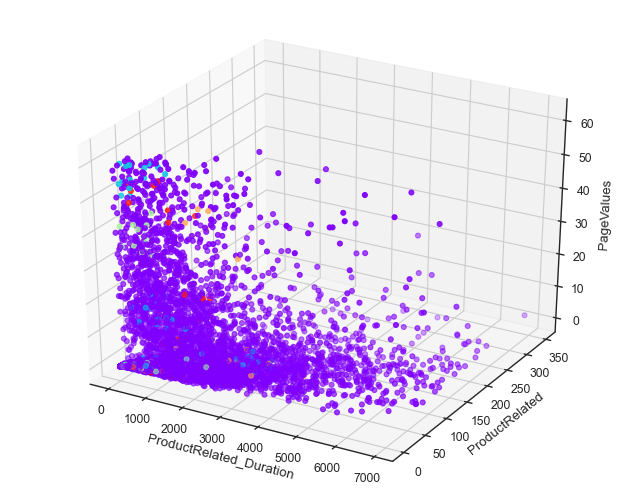

In [72]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['ProductRelated_Duration'],df_cluster['ProductRelated'],df_cluster['PageValues'],c=opt_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.8)
yLabel = ax.set_ylabel('ProductRelated', linespacing=3.8)
zLabel = ax.set_zlabel('PageValues', linespacing=3.4)

print("OPTICS Algorithm")

From the figure above we can see that OPTICS is not suitable for this particular dataset. The algorithm has identified 169 number of clusters.

####  - External Validation for OPTICS Algorithm

In [73]:
AMI_opt = metrics.adjusted_mutual_info_score(class_label, opt_labels)
ARI_opt = metrics.adjusted_rand_score(class_label, opt_labels)
comp_opt = metrics.completeness_score(class_label, opt_labels)
homo_opt = metrics.homogeneity_score(class_label, opt_labels)
MI_opt = metrics.mutual_info_score(class_label, opt_labels)

print(" OPTICS Algorithm External Validation Scores")
print()
print ("Adjusted Mutual Info Score:" "\n", AMI_opt)
print("Adjusted Random Score:" "\n", ARI_opt)
print ("Mutual Information Score:" "\n", MI_opt)
print("Completeness Score:" "\n", comp_opt)
print("Homogeneity Score:" "\n", homo_opt)

 OPTICS Algorithm External Validation Scores

Adjusted Mutual Info Score:
 0.020429416125683202
Adjusted Random Score:
 -0.059681077578152185
Mutual Information Score:
 0.02350728974478443
Completeness Score:
 0.023167775765236116
Homogeneity Score:
 0.057100207663321446


#### vii) Gaussian Mixture Models 

In [74]:
from sklearn import metrics
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(cluster_scaled)
gmm_labels = gmm.predict(cluster_scaled)

labels_unique = np.unique(gmm_labels)
n_clusters_gmm = len(labels_unique)
Si_gmm=metrics.silhouette_score(df_cluster, gmm_labels, metric='euclidean').round(3)
DB_gmm=metrics.davies_bouldin_score(df_cluster, gmm_labels).round(3)
CH_gmm=metrics.calinski_harabasz_score(df_cluster, gmm_labels).round(3)

print('================================ Gaussian Mixture Models Evaluation =================================')
print()
print ("Silhoutte Score:" "\n", Si_gmm)
print()
print("Davies-Bouldin Score:" "\n", DB_gmm)
print()
print ("Calinski-Harabasz Score:" "\n", CH_gmm)
print()
print("Number of clusters:" "\n", n_clusters_gmm)

================================ Gaussian Mixture Models Evaluation =================================

Silhoutte Score:
 0.285

Davies-Bouldin Score:
 1.955

Calinski-Harabasz Score:
 1419.657

Number of clusters:
 2


Gaussian Mixture Models


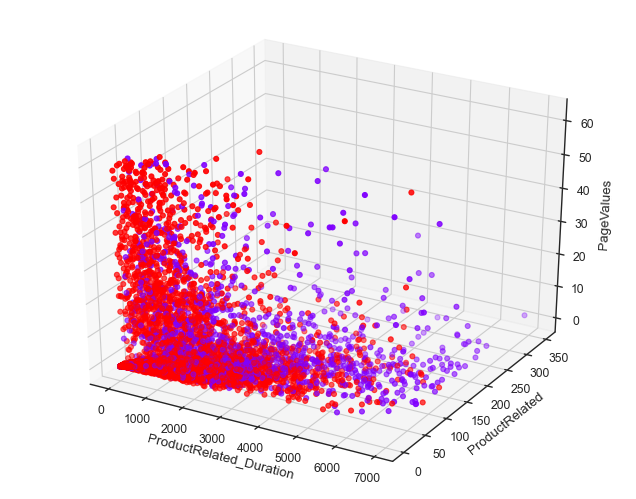

In [75]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['ProductRelated_Duration'],df_cluster['ProductRelated'],df_cluster['PageValues'],c=gmm_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.8)
yLabel = ax.set_ylabel('ProductRelated', linespacing=3.8)
zLabel = ax.set_zlabel('PageValues', linespacing=3.4)

print("Gaussian Mixture Models")

In [76]:
df_clustered_gmm = df_cluster.assign(Cluster=gmm_labels)
grouped_gmm = df_clustered_gmm.groupby(['Cluster']).mean().round(1)
grouped_gmm

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Weekend
Cluster,,,,,,,,,,,,
0,4.3,136.1,2.0,84.2,49.9,1831.2,0.0,0.0,5.9,0.0,2.1,0.3
1,1.6,43.7,0.0,0.0,23.2,830.0,0.0,0.0,3.5,0.1,2.1,0.2


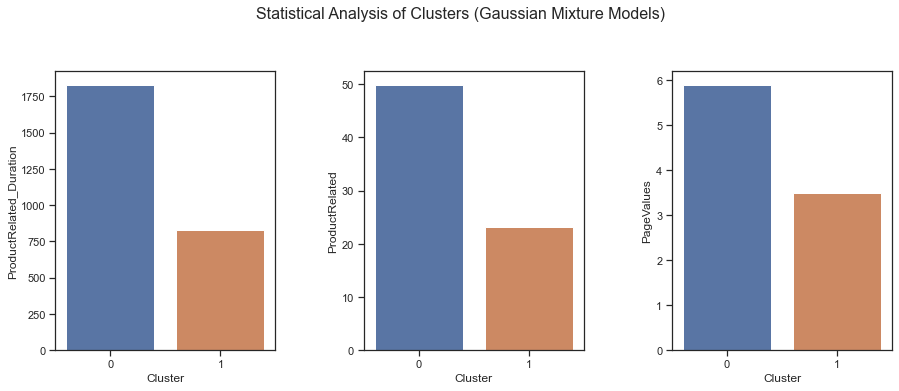

In [77]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=grouped_gmm.index, y=grouped_gmm.ProductRelated_Duration, ax = axs[0])
sns.barplot(x=grouped_gmm.index, y=grouped_gmm.ProductRelated, ax = axs[1])
sns.barplot(x=grouped_gmm.index, y=grouped_gmm.PageValues, ax = axs[2])            
plt.suptitle('Statistical Analysis of Clusters (Gaussian Mixture Models)',y=1.08, fontsize=16)
plt.subplots_adjust(wspace = 0.4, hspace = 0.3, top = 0.9)

plt.show()

##### Characteristics of Clusters:
The table and barplot above shows centroids of each clusters that could determine the clusters characteristics from Gaussian Mixture Models.
These are:

i) Cluster 0: 
- Number of Administrative pages in a session is around 4
- Administrative Duration is around 136.1
- Number of Informational pages in a session is 2
- Informational Duration is around 84.2
- Number of Product Related pages in a session is close to 50
- Product Related Duration is around 1831.2
- Has mean page value of 5.9
- Closeness to special day is 0


ii) Cluster 1:
- Number of Administrative pages in a session is between 1 and 2
- Administrative Duration is around 43.7
- Number of Informational pages in a session is 0
- Informational Duration is around 0
- Number of Product Related pages in a session is around 23
- Product Related Duration is around 830
- Has mean page value of 3.5
- Closeness to special day is 0.1

####  - External Validation for Gaussian Mixture Models

In [78]:
AMI_gmm = metrics.adjusted_mutual_info_score(class_label, gmm_labels)
ARI_gmm = metrics.adjusted_rand_score(class_label, gmm_labels)
comp_gmm = metrics.completeness_score(class_label, gmm_labels)
homo_gmm = metrics.homogeneity_score(class_label, gmm_labels)
MI_gmm = metrics.mutual_info_score(class_label, gmm_labels)

print(" Gaussian Mixture Models External Validation Scores")
print()
print ("Adjusted Mutual Info Score:" "\n", AMI_gmm)
print("Adjusted Random Score:" "\n", ARI_gmm)
print ("Mutual Information Score:" "\n", MI_gmm)
print("Completeness Score:" "\n", comp_gmm)
print("Homogeneity Score:" "\n", homo_gmm)

 Gaussian Mixture Models External Validation Scores

Adjusted Mutual Info Score:
 0.011343966595170039
Adjusted Random Score:
 0.06512853835736306
Mutual Information Score:
 0.00532239135277765
Completeness Score:
 0.01026363493178187
Homogeneity Score:
 0.012928315208115335


#### viii) Affinity Propagation Algorithm 

In [79]:
df_cluster_2 = df2[['ProductRelated','ProductRelated_Duration','PageValues']]
cluster_scaled2 = scaler.fit_transform(df_cluster_2)

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances
preference=euclidean_distances(cluster_scaled2, cluster_scaled2).mean()

af = AffinityPropagation(preference=preference, random_state=42)
af.fit(cluster_scaled2)
af_labels = af.predict(cluster_scaled2)

labels_unique = np.unique(af_labels)
n_clusters_af = len(labels_unique)
Si_af=metrics.silhouette_score(df_cluster_2, af_labels, metric='euclidean').round(3)
DB_af=metrics.davies_bouldin_score(df_cluster_2, af_labels).round(3)
CH_af=metrics.calinski_harabasz_score(df_cluster_2, af_labels).round(3)

print('================================ Affinity Propagation Evaluation =================================')
print()
print ("Silhoutte Score:" "\n", Si_af)
print()
print("Davies-Bouldin Score:" "\n", DB_af)
print()
print ("Calinski-Harabasz Score:" "\n", CH_af)
print()
print("Number of clusters:" "\n", n_clusters_af)

##### Observations related to Affinity Propagation Algorithm:
- It is observed that the clustering results of Affinity Propagation algorithm are influenced by the parameter 'preference' and the algorithm is not suitable for large-scale data clustering for the limitations of memory and time consumptions.
- How to effectively improve the efficiency of Affinity Propagation algorithm on large scale data set is still subjected to research.
- To address this issue, I tried to make subsets of data set and apply Affinity Propagation algorithm but it did not worked either, maybe my computer lacks enough memory.
- For the reasons mentioned above, I decided to skip Affinity Propagation algorithm for this assignment.

#### Tabulated Results for Algorithm Scores (Internal Validation Scores)

In [80]:
table = pd.DataFrame({'Algorithm': ['K-Mean Clustering', 'Mini Batch K- Mean','Mean Shift',
                                    'Hierarchical Agglomerative Clustering','DBSCAN','OPTICS','Guassian Mixture Models'], 
                      'No. of Clusters': [n_clusters_K,n_clusters_mK,n_clusters_ms,n_clusters_hac,n_clusters_dbs,n_clusters_opt
                                          ,n_clusters_gmm], 
                      'Silhoutte Score': [Si_K,Si_mK,Si_ms,Si_hac,Si_dbs,Si_opt,Si_gmm],
                      'Davies-Bouldin Score': [DB_K,DB_mK,DB_ms,DB_hac,DB_dbs,DB_opt,DB_gmm],
                      'Calinski-Harabasz Score': [CH_K,CH_mK,CH_ms,CH_hac,CH_dbs,CH_opt,CH_gmm]})

print('============================== Internal Cluster Validation Scores Summary  ===================================')
table.round(3)

============================== Internal Cluster Validation Scores Summary  ===================================


,Algorithm,No. of Clusters,Silhoutte Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,K-Mean Clustering,2,0.440,1.137,4994.437
1,Mini Batch K- Mean,2,0.415,1.256,3902.956
2,Mean Shift,3,-0.214,2.669,391.131
3,Hierarchical Agglomerative Clustering,2,0.270,1.816,1951.556
4,DBSCAN,56,-0.764,35.841,10.516
5,OPTICS,169,-0.798,33.474,3.875
6,Guassian Mixture Models,2,0.285,1.955,1419.657


The table above shows comparison of all algorithms.
- Silhouette index is normalized and a value close to 1 is considered good
- Davies-Bouldin Score is defined as a ratio between the cluster scatter and the cluster’s separation and a lower value will mean that the clustering is better.
- Calinski-Harabasz Score is a hueristic value, the higher the value, the better is the solution.
- So from the table it is observed that K-Means Clustering algorithm gives best Silhoutte, Davies-Bouldin and Calinski-Harabasz Score.
- It is observed that increased number of clusters has a negative impact on the validation scores.
- DBSCAN and OPTICS algorithm are not suitable for this dataset. 

In conclusion K-Means Clustering algorithm is the best possible clustering algorithm for this problem because it gives best validation scores compared to other algorithms.

#### Tabulated Results for Algorithm Scores (External Validation Scores)

In [81]:
table2 = pd.DataFrame({'Algorithm': ['K-Mean Clustering', 'Mini Batch K- Mean','Mean Shift',
                                    'Hierarchical Agglomerative Clustering','DBSCAN','OPTICS','Guassian Mixture Models'], 
                      'Adjusted Mutual Info Score': [AMI_K,AMI_mK,AMI_ms,AMI_hac,AMI_dbs,AMI_opt,AMI_gmm], 
                      'Adjusted Random Score': [ARI_K,ARI_mK,ARI_ms,ARI_hac,ARI_dbs,ARI_opt,ARI_gmm],
                       'Mutual Information Score': [MI_K,MI_mK,MI_ms,MI_hac,MI_dbs,MI_opt,MI_gmm],
                      'Completeness Score': [comp_K,comp_mK,comp_ms,comp_hac,comp_dbs,comp_opt,comp_gmm],
                       'Homogeneity Score': [homo_K,homo_mK,homo_ms,homo_hac,homo_dbs,homo_opt,homo_gmm]})

print('============================== External Cluster Validation Scores Summary  ===================================')
table2.round(3)

============================== External Cluster Validation Scores Summary  ===================================


,Algorithm,Adjusted Mutual Info Score,Adjusted Random Score,Mutual Information Score,Completeness Score,Homogeneity Score
0,K-Mean Clustering,0.031,0.111,0.015,0.027,0.035
1,Mini Batch K- Mean,0.024,0.098,0.011,0.022,0.027
2,Mean Shift,0.002,0.014,0.000,0.006,0.001
3,Hierarchical Agglomerative Clustering,0.118,0.218,0.059,0.100,0.144
4,DBSCAN,0.017,-0.091,0.012,0.018,0.029
5,OPTICS,0.020,-0.060,0.024,0.023,0.057
6,Guassian Mixture Models,0.011,0.065,0.005,0.010,0.013


The table above shows comparison of all algorithms for External Cluster Validation scores.
- Hierachical Agglomerative Clustering gives best external validation scores
- K means clustering also shows better scores compared to other algorithms

### 5. Hyper Parameter Tuning of Algorithms

In this section, I will change the hyper parameters of each clustering algorithm and find the parameters that give best silhoutte score. I will define Silhoutte score manually and apply in random search Cross Validation. Due to limitation of memory and time consumption, I will use a set of best features from the dataset (ProductRelatedDuration, ProductRelated, PageValues) 

In [82]:
# making a silhoutte score function
from sklearn import metrics
def silhouette_score(estimator, cluster_scaled2):
    labelsb = estimator.fit_predict(cluster_scaled2)
    score = metrics.silhouette_score(cluster_scaled2, labelsb, metric='euclidean')
    return score

#### 1. K-Means Algorithm

In [83]:
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs
grid_values = {'n_clusters':range(2,10,1), 'n_init':[5,10,15], 'max_iter':[250,300,350],
               'algorithm':['auto','full','elkan'], 'random_state':[45]}
clu = KMeans()
clu_K=rs(clu,grid_values,cv=[(slice(None), slice(None))],scoring=silhouette_score)
clu_K.fit(cluster_scaled2)
labels_K = clu_K.predict(cluster_scaled2)

In [84]:
labels_unique = np.unique(labels_K)

n_clusters_K1 = len(labels_unique)
Si_K1 = metrics.silhouette_score(df_cluster_2, labels_K, metric='euclidean').round(3)
DB_K1 = metrics.davies_bouldin_score(df_cluster_2, labels_K).round(3)
CH_K1 = metrics.calinski_harabasz_score(df_cluster_2, labels_K).round(3)
homo_K1 = metrics.homogeneity_score(class_label, labels_K).round(3)
comp_K1 = metrics.completeness_score(class_label, labels_K).round(3)
print("No. of Clusters: \n", n_clusters_K1)
print("Silhoutte Score: \n", Si_K1)
print("Davies Bouldin Score: \n",DB_K1)
print("Calinski Harabasz Score: \n",CH_K1)
print("Homogeneity Score: \n",homo_K1)
print("Completeness Score: \n", comp_K1)
# examine the best model
print("Best Score: \n",clu_K.best_score_.round(3))
print("Best Parametres : \n", clu_K.best_params_)
print("Best Estimator : \n", clu_K.best_estimator_)

No. of Clusters: 
 3
Silhoutte Score: 
 0.242
Davies Bouldin Score: 
 1.597
Calinski Harabasz Score: 
 8662.508
Homogeneity Score: 
 0.223
Completeness Score: 
 0.132
Best Score: 
 0.635
Best Parametres : 
 {'random_state': 45, 'n_init': 10, 'n_clusters': 3, 'max_iter': 300, 'algorithm': 'auto'}
Best Estimator : 
 KMeans(n_clusters=3, random_state=45)


- I chose different n_clusters, n_init, max_iter and algorithm type to tune hyper parameters for K Mean Clustering which would give best Silhoutte score.
- I used Random Search method for hyperparameter tuning as grid search would be computational costly.

#### 2. Mini-Batch K Means Algorithm

In [85]:
grid_values = {'n_clusters':range(2,10,1), 'batch_size':range(10,80,10), 'max_iter':[50,100,150]}
clu = MiniBatchKMeans()
clu_mb=rs(clu,grid_values,cv=[(slice(None), slice(None))],scoring=silhouette_score)
clu_mb.fit(cluster_scaled2)
labels_mb = clu_mb.predict(cluster_scaled2)

In [86]:
labels_unique = np.unique(labels_mb)

n_clusters_mb1 = len(labels_unique)
Si_mb1 = metrics.silhouette_score(df_cluster_2, labels_mb, metric='euclidean').round(3)
DB_mb1 = metrics.davies_bouldin_score(df_cluster_2, labels_mb).round(3)
CH_mb1 = metrics.calinski_harabasz_score(df_cluster_2, labels_mb).round(3)
homo_mb1 = metrics.homogeneity_score(class_label, labels_mb).round(3)
comp_mb1 = metrics.completeness_score(class_label, labels_mb).round(3)
print("No. of Clusters: \n", n_clusters_mb1)
print("Silhoutte Score: \n", Si_mb1)
print("Davies Bouldin Score: \n",DB_mb1)
print("Calinski Harabasz Score: \n",CH_mb1)
print("Homogeneity Score: \n",homo_mb1)
print("Completeness Score: \n", comp_mb1)
# examine the best model
print("Best Score: \n",clu_mb.best_score_.round(3))
print("Best Parametres : \n", clu_mb.best_params_)
print("Best Estimator : \n", clu_mb.best_estimator_)

No. of Clusters: 
 2
Silhoutte Score: 
 0.667
Davies Bouldin Score: 
 0.59
Calinski Harabasz Score: 
 18302.377
Homogeneity Score: 
 0.01
Completeness Score: 
 0.009
Best Score: 
 0.601
Best Parametres : 
 {'n_clusters': 2, 'max_iter': 50, 'batch_size': 20}
Best Estimator : 
 MiniBatchKMeans(batch_size=20, max_iter=50, n_clusters=2)


- I chose different n_clusters, batch_size and max_iter to tune hyper parameters for Mini Batch K Mean Clustering which would give best Silhoutte score.

#### 3. Mean Shift Algorithm

In [87]:
# different bandwidths for hypertuning of mean shift algorithm
bandwidth1=estimate_bandwidth(cluster_scaled2, quantile=0.4)
bandwidth2=estimate_bandwidth(cluster_scaled2, quantile=0.5)
bandwidth3=estimate_bandwidth(cluster_scaled2, quantile=0.6)

In [88]:
grid_values = {'bandwidth':[bandwidth1,bandwidth2,bandwidth3]}
clu = MeanShift()
clu_ms=rs(clu,grid_values,cv=[(slice(None), slice(None))],scoring=silhouette_score)
clu_ms.fit(cluster_scaled2)
labels_ms = clu_ms.predict(cluster_scaled2)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [89]:
labels_unique = np.unique(labels_ms)

n_clusters_ms1 = len(labels_unique)
Si_ms1 = metrics.silhouette_score(df_cluster_2, labels_ms, metric='euclidean').round(3)
DB_ms1 = metrics.davies_bouldin_score(df_cluster_2, labels_ms).round(3)
CH_ms1 = metrics.calinski_harabasz_score(df_cluster_2, labels_ms).round(3)
homo_ms1 = metrics.homogeneity_score(class_label, labels_ms).round(3)
comp_ms1 = metrics.completeness_score(class_label, labels_ms).round(3)
print("No. of Clusters: \n", n_clusters_ms1)
print("Silhoutte Score: \n", Si_ms1)
print("Davies Bouldin Score: \n",DB_ms1)
print("Calinski Harabasz Score: \n",CH_ms1)
print("Homogeneity Score: \n",homo_ms1)
print("Completeness Score: \n", comp_ms1)
# examine the best model
print("Best Score: \n",clu_ms.best_score_.round(3))
print("Best Parametres : \n", clu_ms.best_params_)
print("Best Estimator : \n", clu_ms.best_estimator_)

No. of Clusters: 
 2
Silhoutte Score: 
 0.707
Davies Bouldin Score: 
 0.375
Calinski Harabasz Score: 
 1215.926
Homogeneity Score: 
 0.002
Completeness Score: 
 0.022
Best Score: 
 0.715
Best Parametres : 
 {'bandwidth': 1.6968818254536469}
Best Estimator : 
 MeanShift(bandwidth=1.6968818254536469)


- I chose different bandwidths to tune hyper parameters for Mean Shift algorithm which would give best Silhoutte score.

#### 4. Hierarchical Agglomerative Clustering 

In [90]:
grid_values = {'n_clusters':range(2,8,1), 'linkage':['ward','complete']}
clu = AgglomerativeClustering()
clu_hac=rs(clu,grid_values,cv=[(slice(None), slice(None))],scoring=silhouette_score)
clu_hac.fit(cluster_scaled2)
clu_hac.best_params_

{'n_clusters': 2, 'linkage': 'complete'}

In [91]:
clu = AgglomerativeClustering(n_clusters= 2, linkage= 'complete')
clu.fit(cluster_scaled2)
labels_hac = clu.labels_
labels_unique = np.unique(labels_hac)

n_clusters_hac1 = len(labels_unique)
Si_hac1 = metrics.silhouette_score(df_cluster_2, labels_hac, metric='euclidean').round(3)
DB_hac1 = metrics.davies_bouldin_score(df_cluster_2, labels_hac).round(3)
CH_hac1 = metrics.calinski_harabasz_score(df_cluster_2, labels_hac).round(3)
homo_hac1 = metrics.homogeneity_score(class_label, labels_hac).round(3)
comp_hac1 = metrics.completeness_score(class_label, labels_hac).round(3)
print("No. of Clusters: \n", n_clusters_hac1)
print("Silhoutte Score: \n", Si_hac1)
print("Davies Bouldin Score: \n",DB_hac1)
print("Calinski Harabasz Score: \n",CH_hac1)
print("Homogeneity Score: \n",homo_hac1)
print("Completeness Score: \n", comp_hac1)
# examine the best model
print("Best Score: \n",clu_hac.best_score_.round(3))
print("Best Parametres : \n", clu_hac.best_params_)
print("Best Estimator : \n", clu_hac.best_estimator_)

No. of Clusters: 
 2
Silhoutte Score: 
 0.69
Davies Bouldin Score: 
 0.426
Calinski Harabasz Score: 
 339.738
Homogeneity Score: 
 0.001
Completeness Score: 
 0.023
Best Score: 
 0.751
Best Parametres : 
 {'n_clusters': 2, 'linkage': 'complete'}
Best Estimator : 
 AgglomerativeClustering(linkage='complete')


- I chose different n_clusters​ and linkage to tune hyper parameters for Hierarchical Agglomerative Clustering which would give best Silhoutte score.

#### 5. DBSCAN Algorithm

In [92]:
grid_values = {'eps':[0.3,0.4,0.5,0.6,0.7], 'algorithm':['auto','ball_tree']}
clu = DBSCAN()
clu_dbs=rs(clu,grid_values,cv=[(slice(None), slice(None))],scoring=silhouette_score)
clu_dbs.fit(cluster_scaled2)
clu_dbs.best_params_

{'eps': 0.5, 'algorithm': 'auto'}

In [93]:
clu = DBSCAN(eps= 0.5, algorithm= 'auto')
clu.fit(cluster_scaled2)
labels_dbs = clu.labels_
labels_unique = np.unique(labels_dbs)

n_clusters_dbs1 = len(labels_unique)
Si_dbs1 = metrics.silhouette_score(df_cluster_2, labels_dbs, metric='euclidean').round(3)
DB_dbs1 = metrics.davies_bouldin_score(df_cluster_2, labels_dbs).round(3)
CH_dbs1 = metrics.calinski_harabasz_score(df_cluster_2, labels_dbs).round(3)
homo_dbs1 = metrics.homogeneity_score(class_label, labels_dbs).round(3)
comp_dbs1 = metrics.completeness_score(class_label, labels_dbs).round(3)
print("No. of Clusters: \n", n_clusters_dbs1)
print("Silhoutte Score: \n", Si_dbs1)
print("Davies Bouldin Score: \n",DB_dbs1)
print("Calinski Harabasz Score: \n",CH_dbs1)
print("Homogeneity Score: \n",homo_dbs1)
print("Completeness Score: \n", comp_dbs1)
# examine the best model
print("Best Score: \n",clu_dbs.best_score_.round(3))
print("Best Parametres : \n", clu_dbs.best_params_)
print("Best Estimator : \n", clu_dbs.best_estimator_)

No. of Clusters: 
 3
Silhoutte Score: 
 0.594
Davies Bouldin Score: 
 0.663
Calinski Harabasz Score: 
 541.511
Homogeneity Score: 
 0.013
Completeness Score: 
 0.077
Best Score: 
 0.647
Best Parametres : 
 {'eps': 0.5, 'algorithm': 'auto'}
Best Estimator : 
 DBSCAN()


- I chose different eps and algorithm type to tune hyper parameters for DBSCAN algorithm which would give best Silhoutte score.

#### 6. OPTICS Algorithm

In [94]:
grid_values = {'min_samples':[2,3,4,5,6,7], 'algorithm':['auto','ball_tree']}
clu = OPTICS()
clu_opt=rs(clu,grid_values,cv=[(slice(None), slice(None))],scoring=silhouette_score)
clu_opt.fit(cluster_scaled2)
clu_opt.best_params_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\Admin\anaconda3\lib\site-packages\sklearn

{'min_samples': 2, 'algorithm': 'auto'}

In [95]:
clu = OPTICS(min_samples= 2, algorithm= 'ball_tree')
clu.fit(cluster_scaled2)
labels_opt = clu.labels_
labels_unique = np.unique(labels_opt)

n_clusters_opt1 = len(labels_unique)
Si_opt1 = metrics.silhouette_score(df_cluster_2, labels_opt, metric='euclidean').round(3)
DB_opt1 = metrics.davies_bouldin_score(df_cluster_2, labels_opt).round(3)
CH_opt1 = metrics.calinski_harabasz_score(df_cluster_2, labels_opt).round(3)
homo_opt1 = metrics.homogeneity_score(class_label, labels_opt).round(3)
comp_opt1 = metrics.completeness_score(class_label, labels_opt).round(3)
print("No. of Clusters: \n", n_clusters_opt1)
print("Silhoutte Score: \n", Si_opt1)
print("Davies Bouldin Score: \n",DB_opt1)
print("Calinski Harabasz Score: \n",CH_opt1)
print("Homogeneity Score: \n",homo_opt1)
print("Completeness Score: \n", comp_opt1)
# examine the best model
print("Best Score: \n",clu_opt.best_score_.round(3))
print("Best Parametres : \n", clu_opt.best_params_)
print("Best Estimator : \n", clu_opt.best_estimator_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


No. of Clusters: 
 3254
Silhoutte Score: 
 -0.175
Davies Bouldin Score: 
 5.277
Calinski Harabasz Score: 
 10.01
Homogeneity Score: 
 0.546
Completeness Score: 
 0.031
Best Score: 
 0.377
Best Parametres : 
 {'min_samples': 2, 'algorithm': 'auto'}
Best Estimator : 
 OPTICS(min_samples=2)


- I chose different min_samples and algorithm type to tune hyper parameters for OPTICS algorithm which would give best Silhoutte score.

#### 7. Guassian Mixture Models

In [96]:
from sklearn.model_selection import GridSearchCV as gs
grid_values = {'n_components':[2,3,4,5,6,7],'covariance_type':['full', 'tied', 'diag','spherical']}
clu = GaussianMixture()
clu_gmm=gs(clu,grid_values,cv=[(slice(None), slice(None))],scoring=silhouette_score)
clu_gmm.fit(cluster_scaled2)
labels_gmm = clu_gmm.predict(cluster_scaled2)

In [97]:
labels_unique = np.unique(labels_gmm)

n_clusters_gmm1 = len(labels_unique)
Si_gmm1 = metrics.silhouette_score(df_cluster_2, labels_gmm, metric='euclidean').round(3)
DB_gmm1 = metrics.davies_bouldin_score(df_cluster_2, labels_gmm).round(3)
CH_gmm1 = metrics.calinski_harabasz_score(df_cluster_2, labels_gmm).round(3)
homo_gmm1 = metrics.homogeneity_score(class_label, labels_gmm).round(3)
comp_gmm1 = metrics.completeness_score(class_label, labels_gmm).round(3)
print("No. of Clusters: \n", n_clusters_gmm1)
print("Silhoutte Score: \n", Si_gmm1)
print("Davies Bouldin Score: \n",DB_gmm1)
print("Calinski Harabasz Score: \n",CH_gmm1)
print("Homogeneity Score: \n",homo_gmm1)
print("Completeness Score: \n", comp_gmm1)
# examine the best model
print("Best Score: \n",clu_gmm.best_score_.round(3))
print("Best Parametres : \n", clu_gmm.best_params_)
print("Best Estimator : \n", clu_gmm.best_estimator_)

No. of Clusters: 
 3
Silhoutte Score: 
 0.213
Davies Bouldin Score: 
 2.056
Calinski Harabasz Score: 
 8478.391
Homogeneity Score: 
 0.194
Completeness Score: 
 0.147
Best Score: 
 0.635
Best Parametres : 
 {'covariance_type': 'tied', 'n_components': 3}
Best Estimator : 
 GaussianMixture(covariance_type='tied', n_components=3)


#### Tabulated Results for Algorithm Scores (Hyper parameter Tuned)

In [98]:
table3 = pd.DataFrame({'Algorithm': ['K-Mean Clustering', 'Mini Batch K- Mean','Mean Shift',
                                    'Hierarchical Agglomerative Clustering','DBSCAN','OPTICS','Guassian Mixture Models'], 
                      'No. of Clusters': [n_clusters_K1,n_clusters_mb1,n_clusters_ms1,n_clusters_hac1,n_clusters_dbs1,
                                          n_clusters_opt1,n_clusters_gmm1], 
                      'Silhoutte Score': [Si_K1,Si_ms1,Si_ms1,Si_hac1,Si_dbs1,Si_opt1,Si_gmm1],
                      'Davies-Bouldin Score': [DB_K1,DB_mb1,DB_ms1,DB_hac1,DB_dbs1,DB_opt1,DB_gmm1],
                      'Calinski-Harabasz Score': [CH_K1,CH_mb1,CH_ms1,CH_hac1,CH_dbs1,CH_opt1,CH_gmm1],
                      'Homogeneity Score': [homo_K1,homo_mb1,homo_ms1,homo_hac1,homo_dbs1,homo_opt1,homo_gmm1],
                      'Completeness Score': [comp_K1,comp_mb1,comp_ms1,comp_hac1,comp_dbs1,comp_opt1,comp_gmm1],
                      'Best Score': [clu_K.best_score_.round(3),clu_mb.best_score_.round(3),clu_ms.best_score_.round(3),
                                    clu_hac.best_score_.round(3),clu_dbs.best_score_.round(3),clu_opt.best_score_.round(3),
                                    clu_gmm.best_score_.round(3)]})

print('================================== Hyperparameter Tuning Algorithm Evaluation Summary  =======================================')
table3

================================== Hyperparameter Tuning Algorithm Evaluation Summary  =======================================


,Algorithm,No. of Clusters,Silhoutte Score,Davies-Bouldin Score,Calinski-Harabasz Score,Homogeneity Score,Completeness Score,Best Score
0,K-Mean Clustering,3,0.242,1.597,8662.508,0.223,0.132,0.635
1,Mini Batch K- Mean,2,0.707,0.590,18302.377,0.010,0.009,0.601
2,Mean Shift,2,0.707,0.375,1215.926,0.002,0.022,0.715
3,Hierarchical Agglomerative Clustering,2,0.690,0.426,339.738,0.001,0.023,0.751
4,DBSCAN,3,0.594,0.663,541.511,0.013,0.077,0.647
5,OPTICS,3254,-0.175,5.277,10.010,0.546,0.031,0.377
6,Guassian Mixture Models,3,0.213,2.056,8478.391,0.194,0.147,0.635


### 6. Result Analysis

- From all the clustering algorithms analyzed above, I decided to choose K-Means Clustering Algorithm for the dataset. K-Means Clustering algorithm show best internal validation scores as compared to other algorithms. Best internal validations scores for K Means suggests that the model was most well segmented and compact.
- However, Hierarchical Agglomerative Clustering show best external validation scores when class labels are provided which means Hierarchical Agglomerative Clustering is able to identify the true labels of dataset most efficiently, but K Means Clustering also shows quite decent results for external validations, better than other algorithms.
- It is noticed that density based clustering algorithms (DBSCAN, OPTICS) are unsuitable for this dataset and could not identify optimal number of clusters.
- K Means clustering divided dataset into two clusters.
- The two clusters can be used to determine Revenue status of the customers.
- Each of the cluster have their own characteristics.
- In this section, I will determine the characteristics of clusters and analyze statistics for each cluster identified from K Means Clustering algorithm.

In [99]:
# adding cluster labels to original dataset
df2['cluster_group'] = np.nan
data_length=len(df2)
for i in range(data_length):
    df2.iloc[i,df2.columns.get_loc('cluster_group')] = kmeans_labels[i]
df2.head()

<ipython-input-99-7d436fbf4862>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster_group'] = np.nan
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster_group
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,1.0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,1.0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False,1.0


#### i) Characteristics of K Means Clusters

i) Cluster 0: 
- Number of Administrative pages in a session is around 6
- Administrative Duration is around 177
- Number of Informational pages in a session is between 1 and 2
- Informational Duration is around 70.1
- Number of Product Related pages in a session is close to 63
- Product Related Duration is around 2312.8
- Has mean page value of 8.1
- Closeness to special day is 0.0


ii) Cluster 1:
- Number of Administrative pages in a session is around 1
- Administrative Duration is around 30.8
- Number of Informational pages in a session is around 0
- Informational Duration is around 3
- Number of Product Related pages in a session is close to 19
- Product Related Duration is around 680
- Has mean page value of 2.9
- Closeness to special day is 0.1

#### ii) Statistical Analysis of K Means Clusters

###### Comparison of clusters label distribution and true labels

Text(0.5, 1.0, 'Class label Distribution')

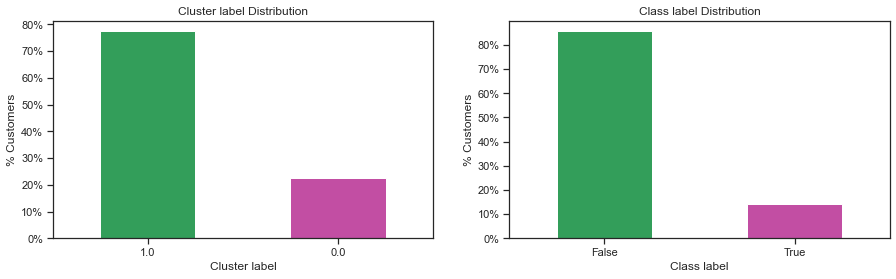

In [100]:
colors = ['#339e5a','#c24ea3']
plt.figure(figsize = (15,4))
ax = plt.subplot(121)

ax = (df2['cluster_group'].value_counts()*100.0 /len(df2)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Cluster label')
ax.set_title('Cluster label Distribution')

ax1 = plt.subplot(122)
ax1 = (df2['Revenue'].value_counts()*100.0 /len(df2)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel('% Customers')
ax1.set_xlabel('Class label')
ax1.set_title('Class label Distribution')

###### Months by cluster labels and true labels

Text(0.5, 1.0, 'Month by True Labels')

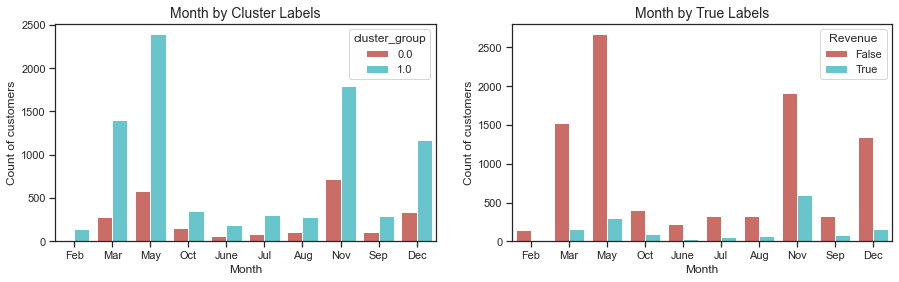

In [101]:
plt.figure(figsize = (15,4))
ax = plt.subplot(121)
ax = sns.countplot(x="Month", data=df2, 
              palette="hls", hue="cluster_group")
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Count of customers", fontsize=12)
ax.set_title("Month by Cluster Labels", fontsize=14)

ax1 = plt.subplot(122)
ax1 = sns.countplot(x="Month", data=df2, 
              palette="hls", hue="Revenue")
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Count of customers", fontsize=12)
ax1.set_title("Month by True Labels", fontsize=14)

###### Weekend Analysis by cluster labels and true labels

Text(0.5, 1.0, 'Weekend by True Labels')

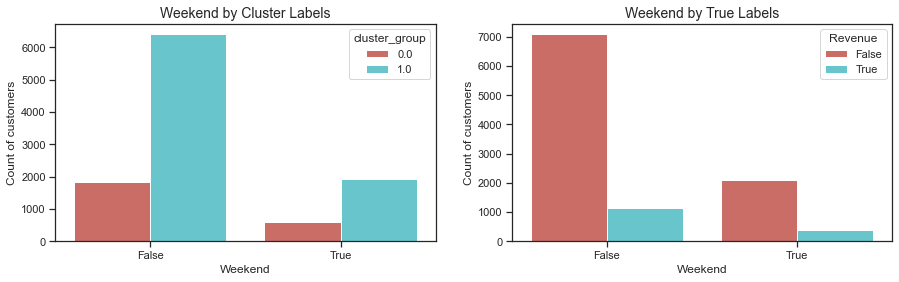

In [102]:
plt.figure(figsize = (15,4))
ax = plt.subplot(121)
ax = sns.countplot(x="Weekend", data=df2, 
              palette="hls", hue="cluster_group")
ax.set_xlabel("Weekend", fontsize=12)
ax.set_ylabel("Count of customers", fontsize=12)
ax.set_title("Weekend by Cluster Labels", fontsize=14)

ax1 = plt.subplot(122)
ax1 = sns.countplot(x="Weekend", data=df2, 
              palette="hls", hue="Revenue")
ax1.set_xlabel("Weekend", fontsize=12)
ax1.set_ylabel("Count of customers", fontsize=12)
ax1.set_title("Weekend by True Labels", fontsize=14)

###### Visitor types by cluster and true labels

Text(0.5, 1.0, 'VisitorType by True Labels')

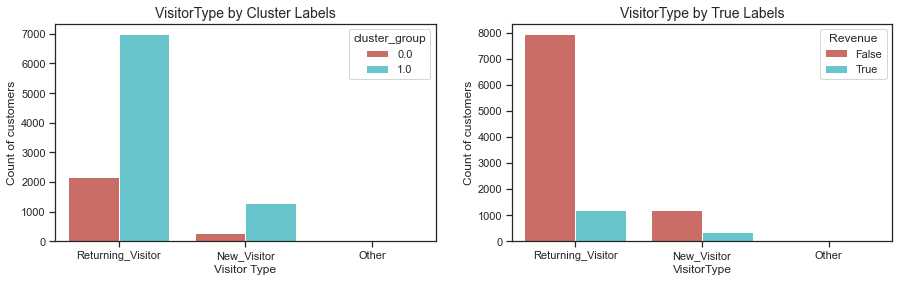

In [103]:
plt.figure(figsize = (15,4))
ax = plt.subplot(121)
ax = sns.countplot(x="VisitorType", data=df2, 
              palette="hls", hue="cluster_group")
ax.set_xlabel("Visitor Type", fontsize=12)
ax.set_ylabel("Count of customers", fontsize=12)
ax.set_title("VisitorType by Cluster Labels", fontsize=14)

ax1 = plt.subplot(122)
ax1 = sns.countplot(x="VisitorType", data=df2, 
              palette="hls", hue="Revenue")
ax1.set_xlabel("VisitorType", fontsize=12)
ax1.set_ylabel("Count of customers", fontsize=12)
ax1.set_title("VisitorType by True Labels", fontsize=14)

###### Traffic type by cluster and true labels

Text(0.5, 1.0, 'TrafficType by True Labels')

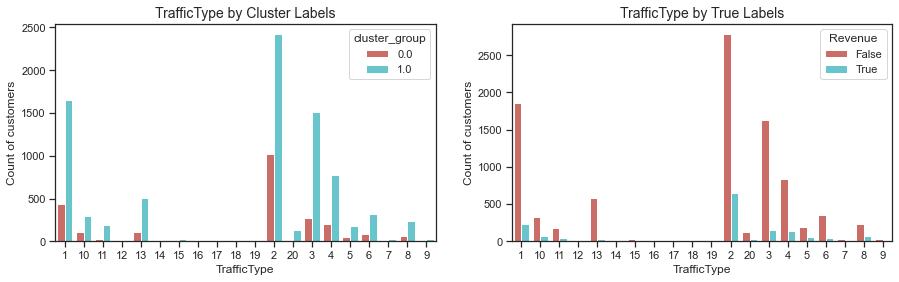

In [104]:
plt.figure(figsize = (15,4))
ax = plt.subplot(121)
ax = sns.countplot(x="TrafficType", data=df2, 
              palette="hls", hue="cluster_group")
ax.set_xlabel("TrafficType", fontsize=12)
ax.set_ylabel("Count of customers", fontsize=12)
ax.set_title("TrafficType by Cluster Labels", fontsize=14)

ax1 = plt.subplot(122)
ax1 = sns.countplot(x="TrafficType", data=df2, 
              palette="hls", hue="Revenue")
ax1.set_xlabel("TrafficType", fontsize=12)
ax1.set_ylabel("Count of customers", fontsize=12)
ax1.set_title("TrafficType by True Labels", fontsize=14)

###### Region by cluster and true labels

Text(0.5, 1.0, 'Region by True Labels')

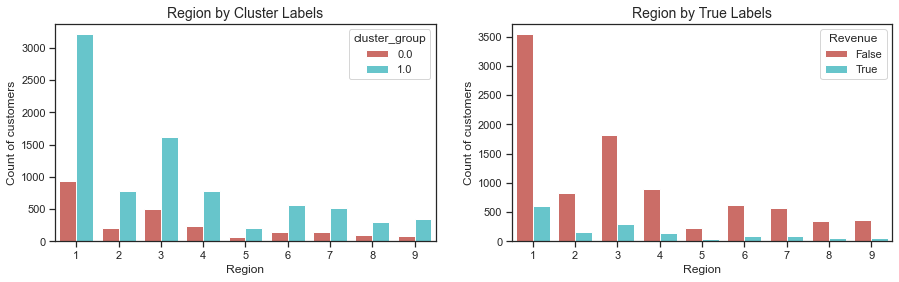

In [105]:
plt.figure(figsize = (15,4))
ax = plt.subplot(121)
ax = sns.countplot(x="Region", data=df2, 
              palette="hls", hue="cluster_group")
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Count of customers", fontsize=12)
ax.set_title("Region by Cluster Labels", fontsize=14)

ax1 = plt.subplot(122)
ax1 = sns.countplot(x="Region", data=df2, 
              palette="hls", hue="Revenue")
ax1.set_xlabel("Region", fontsize=12)
ax1.set_ylabel("Count of customers", fontsize=12)
ax1.set_title("Region by True Labels", fontsize=14)

###### Browser by cluster and true labels

Text(0.5, 1.0, 'Browser by True Labels')

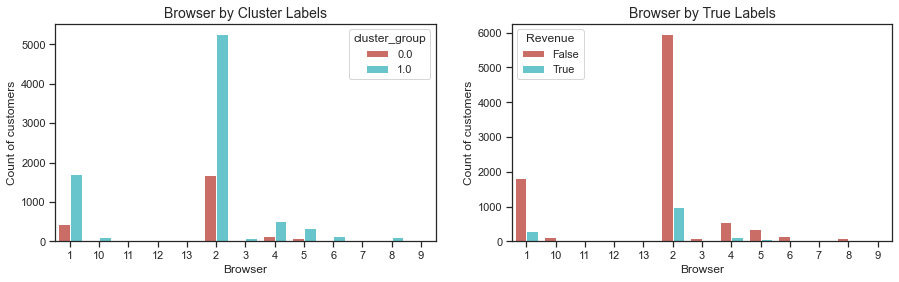

In [106]:
plt.figure(figsize = (15,4))
ax = plt.subplot(121)
ax = sns.countplot(x="Browser", data=df2, 
              palette="hls", hue="cluster_group")
ax.set_xlabel("Browser", fontsize=12)
ax.set_ylabel("Count of customers", fontsize=12)
ax.set_title("Browser by Cluster Labels", fontsize=14)

ax1 = plt.subplot(122)
ax1 = sns.countplot(x="Browser", data=df2, 
              palette="hls", hue="Revenue")
ax1.set_xlabel("Browser", fontsize=12)
ax1.set_ylabel("Count of customers", fontsize=12)
ax1.set_title("Browser by True Labels", fontsize=14)